In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
pd.options.mode.chained_assignment = None

In [2]:
curr_httpgetmt = pd.read_csv('./201801/curr_httpget.csv')
curr_httpgetmt_temp2 = pd.read_csv('./201801/curr_httpgetmt.csv')
curr_httpgetmt = curr_httpgetmt.append(curr_httpgetmt_temp2, ignore_index=True)

curr_httpgetmt6 = pd.read_csv('./201801/curr_httpgetmt6.csv')

curr_httppostmt = pd.read_csv('./201801/curr_httppost.csv')
curr_httppostmt_temp2 = pd.read_csv('./201801/curr_httppostmt.csv')
curr_httppostmt = curr_httppostmt.append(curr_httppostmt_temp2, ignore_index=True)

curr_httppostmt6 = pd.read_csv('./201801/curr_httppostmt6.csv')

for i in ['201802', '201803', '201804', '201805', '201806']:
    
    curr_httpgetmt_temp1 = pd.read_csv('./{}/curr_httpget.csv'.format(i))
    curr_httpgetmt_temp2 = pd.read_csv('./{}/curr_httpgetmt.csv'.format(i))
    curr_httpgetmt = curr_httpgetmt.append(curr_httpgetmt_temp1, ignore_index=True)
    curr_httpgetmt = curr_httpgetmt.append(curr_httpgetmt_temp2, ignore_index=True)
    
    curr_httpgetmt6_temp = pd.read_csv('./{}/curr_httpgetmt6.csv'.format(i))
    curr_httpgetmt6 = curr_httpgetmt6.append(curr_httpgetmt6_temp, ignore_index=True)
    
    curr_httppostmt_temp1 = pd.read_csv('./{}/curr_httppost.csv'.format(i))
    curr_httppostmt_temp2 = pd.read_csv('./{}/curr_httppostmt.csv'.format(i))
    curr_httppostmt = curr_httppostmt.append(curr_httppostmt_temp1, ignore_index=True)
    curr_httppostmt = curr_httppostmt.append(curr_httppostmt_temp2, ignore_index=True)
    
    curr_httppostmt6_temp = pd.read_csv('./{}/curr_httppostmt6.csv'.format(i))
    curr_httppostmt6 = curr_httppostmt6.append(curr_httppostmt6_temp, ignore_index=True)

In [3]:
geo = pd.read_csv('./Unit_Profile/Unit_Profile_2018.csv')
geo['State'] = geo['State'].apply(lambda x: x.strip().upper())
geo['Census'] = geo['Census'].apply(lambda x: x.strip().upper())
geo['ISP'] = geo['ISP'].apply(lambda x: x.strip())
geo['Technology'] = geo['Technology'].apply(lambda x: x.strip())
geo_down = geo[['unit_id', 'ISP', 'Technology', 'State', 'Census', 'Download']]
geo_up = geo[['unit_id', 'ISP', 'Technology', 'State', 'Census', 'Upload']]

In [4]:
# drop the useless column
curr_httpgetmt.drop(['Unnamed: 0'], axis = 1, inplace = True)
curr_httpgetmt6.drop(['Unnamed: 0'], axis = 1, inplace = True)
curr_httppostmt.drop(['Unnamed: 0'], axis = 1, inplace = True)
curr_httppostmt6.drop(['Unnamed: 0'], axis = 1, inplace = True)

# set the dtime column to datetime type
curr_httpgetmt['dtime'] = pd.to_datetime(curr_httpgetmt['dtime'])
curr_httpgetmt6['dtime'] = pd.to_datetime(curr_httpgetmt6['dtime'])
curr_httppostmt['dtime'] = pd.to_datetime(curr_httppostmt['dtime'])
curr_httppostmt6['dtime'] = pd.to_datetime(curr_httppostmt6['dtime'])

### Prepocessing: Choose the reasonable nodes

In [5]:
print('Download:')
curr_httpgetmt['date'] = curr_httpgetmt['dtime'].dt.date
curr_httpgetmt_temp = curr_httpgetmt.groupby(['unit_id', 'date']).count()
curr_httpgetmt_temp.reset_index(['unit_id', 'date'], inplace = True)
curr_httpgetmt_temp = curr_httpgetmt_temp[['unit_id', 'successes']]
curr_httpgetmt_temp = curr_httpgetmt_temp.groupby('unit_id').agg(['count'])
curr_httpgetmt_temp.reset_index('unit_id', inplace = True)
curr_httpgetmt_temp.columns = ['unit_id', 'count']
# TODO: Threshold 120 may change according to date range
curr_httpgetmt_temp = curr_httpgetmt_temp.loc[curr_httpgetmt_temp['count'] > 120, ['unit_id']]
print('Number of reasonable nodes in IPV4: ', len(curr_httpgetmt_temp))

curr_httpgetmt6['date'] = curr_httpgetmt6['dtime'].dt.date
curr_httpgetmt6_temp = curr_httpgetmt6.groupby(['unit_id', 'date']).count()
curr_httpgetmt6_temp.reset_index(['unit_id', 'date'], inplace = True)
curr_httpgetmt6_temp = curr_httpgetmt6_temp[['unit_id', 'successes']]
curr_httpgetmt6_temp = curr_httpgetmt6_temp.groupby('unit_id').agg(['count'])
curr_httpgetmt6_temp.reset_index('unit_id', inplace = True)
curr_httpgetmt6_temp.columns = ['unit_id', 'count']
# TODO: Threshold 120 may change according to date range
curr_httpgetmt6_temp = curr_httpgetmt6_temp.loc[curr_httpgetmt6_temp['count'] > 120, ['unit_id']]
print('Number of reasonable nodes in IPV6: ', len(curr_httpgetmt6_temp))

curr_httpgetmt_merge_temp = curr_httpgetmt_temp.merge(curr_httpgetmt6_temp, how = 'inner', left_on = 'unit_id', right_on = 'unit_id')
print('Number of reasonable nodes in both IPV4 and IPV6: ', len(curr_httpgetmt_merge_temp))

print('Upload:')
curr_httppostmt['date'] = curr_httppostmt['dtime'].dt.date
curr_httppostmt_temp = curr_httppostmt.groupby(['unit_id', 'date']).count()
curr_httppostmt_temp.reset_index(['unit_id', 'date'], inplace = True)
curr_httppostmt_temp = curr_httppostmt_temp[['unit_id', 'successes']]
curr_httppostmt_temp = curr_httppostmt_temp.groupby('unit_id').agg(['count'])
curr_httppostmt_temp.reset_index('unit_id', inplace = True)
curr_httppostmt_temp.columns = ['unit_id', 'count']
# TODO: Threshold 120 may change according to date range
curr_httppostmt_temp = curr_httppostmt_temp.loc[curr_httppostmt_temp['count'] > 120, ['unit_id']]
print('Number of reasonable nodes in IPV4: ', len(curr_httppostmt_temp))

curr_httppostmt6['date'] = curr_httppostmt6['dtime'].dt.date
curr_httppostmt6_temp = curr_httppostmt6.groupby(['unit_id', 'date']).count()
curr_httppostmt6_temp.reset_index(['unit_id', 'date'], inplace = True)
curr_httppostmt6_temp = curr_httppostmt6_temp[['unit_id', 'successes']]
curr_httppostmt6_temp = curr_httppostmt6_temp.groupby('unit_id').agg(['count'])
curr_httppostmt6_temp.reset_index('unit_id', inplace = True)
curr_httppostmt6_temp.columns = ['unit_id', 'count']
# TODO: Threshold 120 may change according to date rangeu
curr_httppostmt6_temp = curr_httppostmt6_temp.loc[curr_httppostmt6_temp['count'] > 120, ['unit_id']]
print('Number of reasonable nodes in IPV6: ', len(curr_httppostmt6_temp))

curr_httppostmt_merge_temp = curr_httppostmt_temp.merge(curr_httppostmt6_temp, how = 'inner', left_on = 'unit_id', right_on = 'unit_id')
print('Number of reasonable nodes in both IPV4 and IPV6: ', len(curr_httppostmt_merge_temp))

reasonable_nodes = curr_httpgetmt_merge_temp.merge(curr_httppostmt_merge_temp, how = 'inner', left_on = 'unit_id', right_on = 'unit_id')
print('\nFinal number of nodes in both IPV4 and IPV6: ', len(reasonable_nodes))

Download:
Number of reasonable nodes in IPV4:  4475
Number of reasonable nodes in IPV6:  862
Number of reasonable nodes in both IPV4 and IPV6:  859
Upload:
Number of reasonable nodes in IPV4:  4471
Number of reasonable nodes in IPV6:  860
Number of reasonable nodes in both IPV4 and IPV6:  857

Final number of nodes in both IPV4 and IPV6:  857


In [6]:
datetime_index = pd.date_range(start='2018-01-01', end='2018-07-01', freq = 'H')[:-1]
merge_byhour = pd.DataFrame()
merge_byhour_dtime = pd.DataFrame()
merge_byhour['unit_id'] = reasonable_nodes['unit_id'].unique()
merge_byhour_dtime['dtime'] = datetime_index
merge_byhour['key'] = 0
merge_byhour_dtime['key'] = 0
merge_byhour = merge_byhour.merge(merge_byhour_dtime, how = 'outer', left_on = 'key', right_on = 'key')
merge_byhour.drop('key', axis = 1, inplace = True)

curr_httpgetmt.drop(['date'], axis = 1, inplace = True)
curr_httpgetmt = curr_httpgetmt.groupby(\
                    ['unit_id', curr_httpgetmt['dtime'].dt.date, curr_httpgetmt['dtime'].dt.hour]).max()
curr_httpgetmt.reset_index('unit_id', inplace = True)
curr_httpgetmt = curr_httpgetmt[['unit_id', 'dtime', 'successes']]
curr_httpgetmt.reset_index(drop = True, inplace  = True)
merge_byhour = merge_byhour.merge(curr_httpgetmt, how = 'left', \
                    left_on = [merge_byhour.unit_id, merge_byhour.dtime.dt.date, merge_byhour.dtime.dt.hour],
                    right_on = [curr_httpgetmt.unit_id, curr_httpgetmt.dtime.dt.date, curr_httpgetmt.dtime.dt.hour])
merge_byhour = merge_byhour[['unit_id_x', 'dtime_x', 'successes']]
merge_byhour.columns = ['unit_id', 'dtime', 'successes_down4']

In [7]:
curr_httpgetmt6.drop(['date'], axis = 1, inplace = True)
curr_httpgetmt6 = curr_httpgetmt6.groupby(\
                    ['unit_id', curr_httpgetmt6['dtime'].dt.date, curr_httpgetmt6['dtime'].dt.hour]).max()
curr_httpgetmt6.reset_index('unit_id', inplace = True)
curr_httpgetmt6 = curr_httpgetmt6[['unit_id', 'dtime', 'successes']]
curr_httpgetmt6.reset_index(drop = True, inplace  = True)
curr_httpgetmt6.columns = ['unit_id', 'dtime', 'successes_down6']
merge_byhour = merge_byhour.merge(curr_httpgetmt6, how = 'left', \
        left_on = [merge_byhour.unit_id, merge_byhour.dtime.dt.date, merge_byhour.dtime.dt.hour],
        right_on = [curr_httpgetmt6.unit_id, curr_httpgetmt6.dtime.dt.date, curr_httpgetmt6.dtime.dt.hour])
merge_byhour = merge_byhour[['unit_id_x', 'dtime_x', 'successes_down4', 'successes_down6']]
merge_byhour.columns = ['unit_id', 'dtime', 'successes_down4', 'successes_down6']

In [8]:
curr_httppostmt.drop(['date'], axis = 1, inplace = True)
curr_httppostmt = curr_httppostmt.groupby(\
                    ['unit_id', curr_httppostmt['dtime'].dt.date, curr_httppostmt['dtime'].dt.hour]).max()
curr_httppostmt.reset_index('unit_id', inplace = True)
curr_httppostmt = curr_httppostmt[['unit_id', 'dtime', 'successes']]
curr_httppostmt.reset_index(drop = True, inplace  = True)
curr_httppostmt.columns = ['unit_id', 'dtime', 'successes_up4']
merge_byhour = merge_byhour.merge(curr_httppostmt, how = 'left', \
                    left_on = [merge_byhour.unit_id, merge_byhour.dtime.dt.date, merge_byhour.dtime.dt.hour],
                    right_on = [curr_httppostmt.unit_id, curr_httppostmt.dtime.dt.date, curr_httppostmt.dtime.dt.hour])
merge_byhour = merge_byhour[['unit_id_x', 'dtime_x', 'successes_down4', 'successes_down6', 'successes_up4']]
merge_byhour.columns = ['unit_id', 'dtime', 'successes_down4', 'successes_down6', 'successes_up4']

In [9]:
curr_httppostmt6.drop(['date'], axis = 1, inplace = True)
curr_httppostmt6 = curr_httppostmt6.groupby(\
                    ['unit_id', curr_httppostmt6['dtime'].dt.date, curr_httppostmt6['dtime'].dt.hour]).max()
curr_httppostmt6.reset_index('unit_id', inplace = True)
curr_httppostmt6 = curr_httppostmt6[['unit_id', 'dtime', 'successes']]
curr_httppostmt6.reset_index(drop = True, inplace  = True)
curr_httppostmt6.columns = ['unit_id', 'dtime', 'successes_up6']
merge_byhour = merge_byhour.merge(curr_httppostmt6, how = 'left', \
                    left_on = [merge_byhour.unit_id, merge_byhour.dtime.dt.date, merge_byhour.dtime.dt.hour],
                    right_on = [curr_httppostmt6.unit_id, curr_httppostmt6.dtime.dt.date, curr_httppostmt6.dtime.dt.hour])
merge_byhour = merge_byhour[['unit_id_x', 'dtime_x', 'successes_down4', 'successes_down6', 'successes_up4','successes_up6']]
merge_byhour.columns = ['unit_id', 'dtime', 'successes_down4', 'successes_down6', 'successes_up4','successes_up6']

In [10]:
merge_byhour.head()

,unit_id,dtime,successes_down4,successes_down6,successes_up4,successes_up6
0,723,2018-01-01 00:00:00,1.0,NaN,1.0,NaN
1,723,2018-01-01 01:00:00,1.0,NaN,1.0,NaN
2,723,2018-01-01 02:00:00,1.0,NaN,1.0,NaN
3,723,2018-01-01 03:00:00,1.0,NaN,1.0,NaN
4,723,2018-01-01 04:00:00,NaN,NaN,NaN,NaN


In [11]:
len(merge_byhour.groupby('unit_id').count())

857

In [26]:
"""
datetime_index = pd.date_range(start='2018-01-01', end='2018-07-01', freq = 'H')[:-1]
get4_fill = pd.DataFrame()
get4_fill_dtime = pd.DataFrame()
get4_fill['unit_id'] = curr_httpgetmt['unit_id'].unique()
get4_fill_dtime['dtime'] = datetime_index
get4_fill['key'] = 0
get4_fill_dtime['key'] = 0
get4_fill = get4_fill.merge(get4_fill_dtime, how = 'outer', left_on = 'key', right_on = 'key')
get4_fill.drop('key', axis = 1, inplace = True)

curr_httpgetmt = curr_httpgetmt.groupby(\
                    ['unit_id', curr_httpgetmt['dtime'].dt.date, curr_httpgetmt['dtime'].dt.hour]).max()
curr_httpgetmt.reset_index('unit_id', inplace = True)
curr_httpgetmt = curr_httpgetmt[['unit_id', 'dtime', 'successes']]
curr_httpgetmt.reset_index(drop = True, inplace  = True)

curr_httpgetmt_fill = get4_fill.merge(curr_httpgetmt, how = 'left', \
                    left_on = [get4_fill.unit_id, get4_fill.dtime.dt.date, get4_fill.dtime.dt.hour],
                    right_on = [curr_httpgetmt.unit_id, curr_httpgetmt.dtime.dt.date, curr_httpgetmt.dtime.dt.hour])
curr_httpgetmt_fill = curr_httpgetmt_fill[['unit_id_x', 'dtime_x', 'successes']]
curr_httpgetmt_fill.columns = ['unit_id', 'dtime', 'successes']
curr_httpgetmt_fill['successes'].fillna(1, inplace = True)
"""

"\ndatetime_index = pd.date_range(start='2018-01-01', end='2018-07-01', freq = 'H')[:-1]\nget4_fill = pd.DataFrame()\nget4_fill_dtime = pd.DataFrame()\nget4_fill['unit_id'] = curr_httpgetmt['unit_id'].unique()\nget4_fill_dtime['dtime'] = datetime_index\nget4_fill['key'] = 0\nget4_fill_dtime['key'] = 0\nget4_fill = get4_fill.merge(get4_fill_dtime, how = 'outer', left_on = 'key', right_on = 'key')\nget4_fill.drop('key', axis = 1, inplace = True)\n\ncurr_httpgetmt = curr_httpgetmt.groupby(                    ['unit_id', curr_httpgetmt['dtime'].dt.date, curr_httpgetmt['dtime'].dt.hour]).max()\ncurr_httpgetmt.reset_index('unit_id', inplace = True)\ncurr_httpgetmt = curr_httpgetmt[['unit_id', 'dtime', 'successes']]\ncurr_httpgetmt.reset_index(drop = True, inplace  = True)\n\ncurr_httpgetmt_fill = get4_fill.merge(curr_httpgetmt, how = 'left',                     left_on = [get4_fill.unit_id, get4_fill.dtime.dt.date, get4_fill.dtime.dt.hour],\n                    right_on = [curr_httpgetmt.uni

##### 1. How many nodes have both and how many have only IPv4?

In [9]:
get4_bynode = curr_httpgetmt.groupby('unit_id').max()
get6_bynode = curr_httpgetmt6.groupby('unit_id').max()
get_merge_bynode = get4_bynode.merge(get6_bynode, how = 'inner', left_on = 'unit_id', right_on = 'unit_id')
post4_bynode = curr_httppostmt.groupby('unit_id').max()
post6_bynode = curr_httppostmt6.groupby('unit_id').max()
post_merge_bynode = post4_bynode.merge(post6_bynode, how = 'inner', left_on = 'unit_id', right_on = 'unit_id')
print('Download:')
print('Number of nodes having IPV4: ', len(get4_bynode))
print('Number of nodes having IPV6: ', len(get6_bynode))
print('Number of nodes having both IPV4 and IPV6: ', len(get_merge_bynode))
print('Upload:')
print('Number of nodes having IPV4: ', len(post4_bynode))
print('Number of nodes having IPV6: ', len(post6_bynode))
print('Number of nodes having both IPV4 and IPV6: ', len(post_merge_bynode))

Download:
Number of nodes having IPV4:  5354
Number of nodes having IPV6:  1163
Number of nodes having both IPV4 and IPV6:  1163
Upload:
Number of nodes having IPV4:  5346
Number of nodes having IPV6:  1162
Number of nodes having both IPV4 and IPV6:  1161


In [10]:
post4_bynode.reset_index('unit_id', inplace = True)
post6_bynode.reset_index('unit_id', inplace = True)
post_merge_bynode.reset_index('unit_id', inplace = True)
set(post6_bynode['unit_id'].unique()) - set(post_merge_bynode['unit_id'].unique())

{662416}

In [11]:
post6_bynode[post6_bynode['unit_id'] == 662416]

,unit_id,dtime,successes
399,662416,2018-06-30 23:24:03,1


In [12]:
post4_bynode[post4_bynode['unit_id'] == 662416]

,unit_id,dtime,successes


#### 2. When IPv6 is unavailable (outage), is IPv4, too or are there IPv6-only outages?

In [12]:
print('Download:')
down_total = len(merge_byhour[((merge_byhour['successes_down6'].notnull()) & (merge_byhour['successes_down4'].notnull()))])
print('Percentage of time when neither IPV4 and IPV6 is available:')
print(len(merge_byhour[((merge_byhour['successes_down6'] == 0.0) & (merge_byhour['successes_down4'] == 0.0))]) / down_total)
print('Percentage of time when both IPV4 and IPV6 are available:')
print(len(merge_byhour[((merge_byhour['successes_down6'] == 1.0) & (merge_byhour['successes_down4'] == 1.0))]) / down_total)
print('Percentage of time when only IPV4 is available:')
print(len(merge_byhour[((merge_byhour['successes_down6'] == 0.0) & (merge_byhour['successes_down4'] == 1.0))]) / down_total)
print('Percentage of time when only IPV6 is available:')
print(len(merge_byhour[((merge_byhour['successes_down6'] == 1.0) & (merge_byhour['successes_down4'] == 0.0))]) / down_total)

print('\nUpload:')
up_total = len(merge_byhour[((merge_byhour['successes_up6'].notnull()) & (merge_byhour['successes_up4'].notnull()))])
print('Percentage of time when neither IPV4 and IPV6 is available:')
print(len(merge_byhour[((merge_byhour['successes_up6'] == 0.0) & (merge_byhour['successes_up4'] == 0.0))]) / up_total)
print('Percentage of time when both IPV4 and IPV6 are available:')
print(len(merge_byhour[((merge_byhour['successes_up6'] == 1.0) & (merge_byhour['successes_up4'] == 1.0))]) / up_total)
print('Percentage of time when only IPV4 is available:')
print(len(merge_byhour[((merge_byhour['successes_up6'] == 0.0) & (merge_byhour['successes_up4'] == 1.0))]) / up_total)
print('Percentage of time when only IPV6 is available:')
print(len(merge_byhour[((merge_byhour['successes_up6'] == 1.0) & (merge_byhour['successes_up4'] == 0.0))]) / up_total)

Download:
Percentage of time when neither IPV4 and IPV6 is available:
0.010073957815301649
Percentage of time when both IPV4 and IPV6 are available:
0.8071302451420984
Percentage of time when only IPV4 is available:
0.17909106255617555
Percentage of time when only IPV6 is available:
0.003704734486424338

Upload:
Percentage of time when neither IPV4 and IPV6 is available:
0.025200431337615452
Percentage of time when both IPV4 and IPV6 are available:
0.783599793708097
Percentage of time when only IPV4 is available:
0.1841905387031741
Percentage of time when only IPV6 is available:
0.007009236251113507


In [13]:
down_all_byid = merge_byhour.groupby(merge_byhour.unit_id).count()[['dtime']]
down_all_byid.reset_index('unit_id', inplace = True)
down_all_byid.columns = ['unit_id', 'count']
down_all_byid = down_all_byid.merge(geo_down, how = 'inner', left_on = 'unit_id', right_on = 'unit_id')
down_all_byid = down_all_byid[['unit_id', 'ISP', 'Technology']]
down_all_byid = down_all_byid.groupby(['ISP', 'Technology']).count()[['unit_id']]
down_all_byid.columns = ['total']
down_all_byid.reset_index(['ISP', 'Technology'], inplace = True)

down_only4 = merge_byhour[((merge_byhour['successes_down6'] == 0.0) & (merge_byhour['successes_down4'] == 1.0))]
down_only4.reset_index(drop = True, inplace = True)
down_only4 = down_only4[['unit_id', 'dtime']]
down_only4_byid = down_only4.groupby(down_only4.unit_id).count()
down_only4_byid.reset_index('unit_id', inplace = True)
down_only4_byid.columns = ['unit_id', 'count']
down_only4_byid = down_only4_byid.merge(geo_down, how = 'inner', left_on = 'unit_id', right_on = 'unit_id')
down_only4_byid = down_only4_byid[['unit_id', 'count', 'ISP', 'Technology', 'Download']]
down_only4_byid = down_only4_byid.groupby(['ISP', 'Technology']).count()[['count']]
down_only4_byid.reset_index(['ISP', 'Technology'], inplace = True)
down_only4_byid['total'] = down_all_byid['total']
down_only4_byid['percentage'] = round(down_only4_byid['count'] / down_only4_byid['total'], 2)
down_only4_byid

,ISP,Technology,count,total,percentage
0,AT&T,IPBB,190,253,0.75
1,CenturyLink,DSL,10,13,0.77
2,Charter,Cable,94,111,0.85
3,Cincinnati Bell,DSL,1,1,1.00
4,Comcast,Cable,87,116,0.75
5,Cox,Cable,34,50,0.68
6,Frontier,DSL,2,3,0.67
7,Frontier,Fiber,3,3,1.00
8,Hawaiian Telcom,DSL,1,1,1.00
9,Hughes,Satellite,50,50,1.00


##### 3. Does availability differ by carrier and speed tier?

##### IPV4 Download

In [14]:
merge_byhour.head()

,unit_id,dtime,successes_down4,successes_down6,successes_up4,successes_up6
0,723,2018-01-01 00:00:00,1.0,NaN,1.0,NaN
1,723,2018-01-01 01:00:00,1.0,NaN,1.0,NaN
2,723,2018-01-01 02:00:00,1.0,NaN,1.0,NaN
3,723,2018-01-01 03:00:00,1.0,NaN,1.0,NaN
4,723,2018-01-01 04:00:00,NaN,NaN,NaN,NaN


In [16]:
# start to calculate availability by node
curr_httpgetmt_fill = merge_byhour[['unit_id', 'dtime', 'successes_down4']]
curr_httpgetmt_fill.columns = ['unit_id', 'dtime', 'successes']
curr_httpgetmt_fill['successes'].fillna(1, inplace = True)
curr_httpgetmt_fill = curr_httpgetmt_fill[['unit_id', 'successes']]
get4_bynode_ava = curr_httpgetmt_fill.groupby('unit_id').sum()
max_ava = max(get4_bynode_ava['successes'])
get4_bynode_ava['availability'] = get4_bynode_ava['successes'] / max_ava
get4_bynode_ava['unavailability'] = 1 - get4_bynode_ava['availability']
get4_bynode_ava = get4_bynode_ava[['availability', 'unavailability']]
get4_bynode_ava.reset_index('unit_id', inplace = True)

# merge with unit profile
get4_bynode_ava = get4_bynode_ava.merge(geo_down, how = 'inner', left_on = 'unit_id', right_on = 'unit_id')
get4_bynode_ava = get4_bynode_ava[['unit_id', 'availability', 'unavailability', 'ISP', 'Technology', 'State', 'Download']]
get4_bynode_ava.head()

,unit_id,availability,unavailability,ISP,Technology,State,Download
0,1165,0.998849,0.001151,Verizon,Fiber,VA,75.0
1,5308,1.000000,0.000000,Comcast,Cable,IL,75.0
2,5321,0.999770,0.000230,Charter,Cable,NC,20.0
3,5436,0.999770,0.000230,Charter,Cable,NH,100.0
4,5714,0.999770,0.000230,Charter,Cable,SC,20.0


In [29]:
get4_bynode_ava['availability'].describe()

count    651.000000
mean       0.994918
std        0.022077
min        0.725599
25%        0.997468
50%        0.999079
75%        0.999770
max        1.000000
Name: availability, dtype: float64

In [18]:
# explore the nodes having extremely low availability
print('Explore the nodes having extremely low availability:')
print('Percentage of nodes availability < 0.9: ' + \
      str(round(len(get4_bynode_ava[get4_bynode_ava['availability'] < 0.9]) * 100/len(get4_bynode_ava), 3)) + '%')
print('Percentage of nodes availability < 0.95: ' + \
      str(round(len(get4_bynode_ava[get4_bynode_ava['availability'] < 0.95]) * 100/len(get4_bynode_ava), 3)) + '%')
print('Percentage of nodes availability < 0.98: ' + \
      str(round(len(get4_bynode_ava[get4_bynode_ava['availability'] < 0.98]) * 100/len(get4_bynode_ava), 3)) + '%')
print('Percentage of nodes availability < 0.99: '+ \
      str(round(len(get4_bynode_ava[get4_bynode_ava['availability'] < 0.99]) * 100/len(get4_bynode_ava), 3)) + '%')

Explore the nodes having extremely low availability:
Percentage of nodes availability < 0.9: 1.075%
Percentage of nodes availability < 0.95: 1.69%
Percentage of nodes availability < 0.98: 3.687%
Percentage of nodes availability < 0.99: 7.988%


In [21]:
# explore the characteristics of normal nodes
get4_tech_isp = get4_bynode_ava[['availability', 'Technology', 'ISP']].groupby(['Technology', 'ISP']).mean()
get4_tech_isp.reset_index(['Technology', 'ISP'], inplace = True)
get4_tech_isp['unavailability'] = 1 - get4_tech_isp['availability']
get4_tech_isp.sort_values(by = ['Technology', 'ISP'], ascending = True, inplace = True)
get4_tech_isp

,Technology,ISP,availability,unavailability
0,Cable,Charter,0.997982,0.002018
1,Cable,Comcast,0.997970,0.002030
2,Cable,Cox,0.998619,0.001381
3,Cable,Mediacom,0.984854,0.015146
4,Cable,Optimum,0.997238,0.002762
5,DSL,CenturyLink,0.995467,0.004533
6,DSL,Cincinnati Bell,0.999540,0.000460
7,DSL,Frontier,0.998082,0.001918
8,DSL,Hawaiian Telcom,0.997468,0.002532
9,DSL,Windstream,0.998005,0.001995


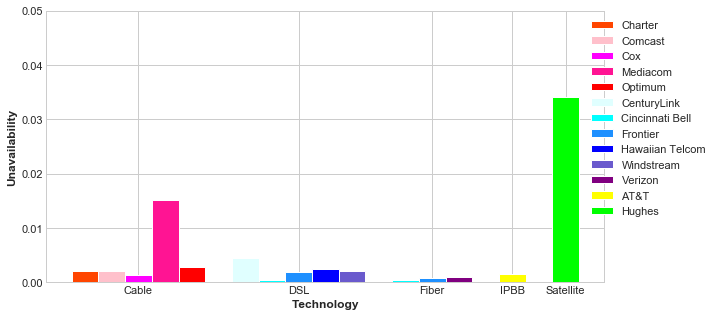

In [44]:
# set width of bar
barWidth = 0.25
 
# set height of bar
Charter = get4_tech_isp.loc[get4_tech_isp['ISP'] == 'Charter']['unavailability'].tolist()
Comcast = get4_tech_isp.loc[get4_tech_isp['ISP'] == 'Comcast']['unavailability'].tolist()
Cox = get4_tech_isp.loc[get4_tech_isp['ISP'] == 'Cox']['unavailability'].tolist()
Mediacom = get4_tech_isp.loc[get4_tech_isp['ISP'] == 'Mediacom']['unavailability'].tolist()
Optimum = get4_tech_isp.loc[get4_tech_isp['ISP'] == 'Optimum']['unavailability'].tolist()
CenturyLink = get4_tech_isp.loc[get4_tech_isp['ISP'] == 'CenturyLink']['unavailability'].tolist()
Cincinnati_Bell = get4_tech_isp.loc[get4_tech_isp['ISP'] == 'Cincinnati Bell']['unavailability'].tolist()
Frontier = get4_tech_isp.loc[get4_tech_isp['ISP'] == 'Frontier']['unavailability'].tolist()
Hawaiian_Telcom = get4_tech_isp.loc[get4_tech_isp['ISP'] == 'Hawaiian Telcom']['unavailability'].tolist()
Windstream = get4_tech_isp.loc[get4_tech_isp['ISP'] == 'Windstream']['unavailability'].tolist()
Verizon = get4_tech_isp.loc[get4_tech_isp['ISP'] == 'Verizon']['unavailability'].tolist()
ATT = get4_tech_isp.loc[get4_tech_isp['ISP'] == 'AT&T']['unavailability'].tolist()
Hughes = get4_tech_isp.loc[get4_tech_isp['ISP'] == 'Hughes']['unavailability'].tolist()
 
# Set position of bar on X axis
# Cable
Charter_loc = [0]
Comcast_loc = [Charter_loc[0] + barWidth]
Cox_loc = [Charter_loc[0] + 2 * barWidth]
Mediacom_loc = [Charter_loc[0] + 3 * barWidth]
Optimum_loc = [Charter_loc[0] + 4 * barWidth]

# DSL (including Fiber)
CenturyLink_loc = [Charter_loc[0] + 6 * barWidth]
Cincinnati_Bell_loc = [Charter_loc[0] + 7 * barWidth, Charter_loc[0] + 12 * barWidth]
Frontier_loc = [Charter_loc[0] + 8 * barWidth, Charter_loc[0] + 13 * barWidth]
Hawaiian_Telcom_loc = [Charter_loc[0] + 9 * barWidth]
Windstream_loc = [Charter_loc[0] + 10 * barWidth]

# Fiber
Verizon_loc = [Charter_loc[0] + 14 * barWidth]

# IPBB
ATT_loc = [Charter_loc[0] + 16 * barWidth]

# satellite
Hughes_loc = [Charter_loc[0] + 18 * barWidth]
 
# Make the plot

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 5))
_ = plt.bar(Charter_loc, Charter, color='orangered', width=barWidth, edgecolor='white', label='Charter')
_ = plt.bar(Comcast_loc, Comcast, color='pink', width=barWidth, edgecolor='white', label='Comcast')
_ = plt.bar(Cox_loc, Cox, color='fuchsia', width=barWidth, edgecolor='white', label='Cox')
_ = plt.bar(Mediacom_loc, Mediacom, color='deeppink', width=barWidth, edgecolor='white', label='Mediacom')
_ = plt.bar(Optimum_loc, Optimum, color='red', width=barWidth, edgecolor='white', label='Optimum')
_ = plt.bar(CenturyLink_loc, CenturyLink, color='lightcyan', width=barWidth, edgecolor='white', label='CenturyLink')
_ = plt.bar(Cincinnati_Bell_loc, Cincinnati_Bell, color='cyan', width=barWidth, edgecolor='white', label='Cincinnati Bell')
_ = plt.bar(Frontier_loc, Frontier, color='dodgerblue', width=barWidth, edgecolor='white', label='Frontier')
_ = plt.bar(Hawaiian_Telcom_loc, Hawaiian_Telcom, color='blue', width=barWidth, edgecolor='white', label='Hawaiian Telcom')
_ = plt.bar(Windstream_loc, Windstream, color='slateblue', width=barWidth, edgecolor='white', label='Windstream')
_ = plt.bar(Verizon_loc, Verizon, color='purple', width=barWidth, edgecolor='white', label='Verizon')
_ = plt.bar(ATT_loc, ATT, color='yellow', width=barWidth, edgecolor='white', label='AT&T')
_ = plt.bar(Hughes_loc, Hughes, color='lime', width=barWidth, edgecolor='white', label='Hughes')
 
# Add xticks on the middle of the group bars
_ = plt.xlabel('Technology', fontweight='bold')
_ = plt.ylabel('Unavailability', fontweight='bold')
_ = plt.ylim((0, 0.05))
_ = plt.xticks([0.5, 2, 3.25, 4, 4.5], ['Cable', 'DSL', 'Fiber', 'IPBB', 'Satellite'])
 
# Create legend & Show graphic
_ = plt.legend(bbox_to_anchor=(1.2, 1), shadow = True)

In [26]:
# explore if the availability is relevant to tiers
get4_tier = get4_bynode_ava[['availability', 'Technology', 'Download']].groupby(['Technology', 'Download']).mean()
get4_tier['availability'] = round(get4_tier['availability'] * 100, 2)
get4_tier

availability
Technology Download              
Cable      20.0             99.94
           25.0             99.86
           30.0             99.83
           40.0             99.98
           50.0             99.76
           60.0             98.81
           75.0             99.84
           100.0            99.81
           101.0            99.84
           105.0            99.83
           150.0            99.90
           200.0            99.77
           250.0            98.69
           300.0            99.79
DSL        3.0              99.44
           6.0              99.70
           7.0              99.00
           8.0              99.84
           10.0             99.91
           12.0             99.58
           20.0             99.93
           30.0             99.95
           40.0             99.93
Fiber      25.0             99.91
           75.0             99.94
           100.0            99.90
IPBB       1.5              99.59
           3.0              99.65
           5.0              99.93
           6.0              99.88
           10.0             99.88
           12.0             99.85
           18.0             99.91
           24.0             99.90
           45.0             99.79
Satellite  5.0              91.40
           10.0             98.31
           25.0             98.19

##### IPV6 Download

In [27]:
curr_httpgetmt6_fill = merge_byhour[['unit_id', 'dtime', 'successes_down6']]
curr_httpgetmt6_fill.columns = ['unit_id', 'dtime', 'successes']
curr_httpgetmt6_fill['successes'].fillna(1, inplace = True)
curr_httpgetmt6_fill = curr_httpgetmt6_fill[['unit_id', 'successes']]
get6_bynode_ava = curr_httpgetmt6_fill.groupby('unit_id').sum()
max_ava = max(get6_bynode_ava['successes'])
get6_bynode_ava['availability'] = get6_bynode_ava['successes'] / max_ava
get6_bynode_ava['unavailability'] = 1 - get6_bynode_ava['availability']
get6_bynode_ava = get6_bynode_ava[['availability', 'unavailability']]
get6_bynode_ava.reset_index('unit_id', inplace = True)

# merge with unit profile
get6_bynode_ava = get6_bynode_ava.merge(geo_down, how = 'inner', left_on = 'unit_id', right_on = 'unit_id')
get6_bynode_ava = get6_bynode_ava[['unit_id', 'availability', 'unavailability', 'ISP', 'Technology', 'State', 'Download']]
get6_bynode_ava.head()

,unit_id,availability,unavailability,ISP,Technology,State,Download
0,1165,0.878453,0.121547,Verizon,Fiber,VA,75.0
1,5308,0.877532,0.122468,Comcast,Cable,IL,75.0
2,5321,0.875230,0.124770,Charter,Cable,NC,20.0
3,5436,0.962247,0.037753,Charter,Cable,NH,100.0
4,5714,0.906077,0.093923,Charter,Cable,SC,20.0


In [30]:
get6_bynode_ava['availability'].describe()

count    651.000000
mean       0.978628
std        0.033944
min        0.875000
25%        0.971340
50%        0.995626
75%        0.999540
max        1.000000
Name: availability, dtype: float64

In [31]:
# explore the nodes having extremely low availability
print('Explore the nodes having extremely low availability:')
print('Percentage of nodes availability < 0.9: ' + \
      str(round(len(get6_bynode_ava[get6_bynode_ava['availability'] < 0.9]) * 100/len(get6_bynode_ava), 3)) + '%')
print('Percentage of nodes availability < 0.95: ' + \
      str(round(len(get6_bynode_ava[get6_bynode_ava['availability'] < 0.95]) * 100/len(get6_bynode_ava), 3)) + '%')
print('Percentage of nodes availability < 0.98: ' + \
      str(round(len(get6_bynode_ava[get6_bynode_ava['availability'] < 0.98]) * 100/len(get6_bynode_ava), 3)) + '%')
print('Percentage of nodes availability < 0.99: '+ \
      str(round(len(get6_bynode_ava[get6_bynode_ava['availability'] < 0.99]) * 100/len(get6_bynode_ava), 3)) + '%')

Explore the nodes having extremely low availability:
Percentage of nodes availability < 0.9: 7.834%
Percentage of nodes availability < 0.95: 13.057%
Percentage of nodes availability < 0.98: 29.954%
Percentage of nodes availability < 0.99: 38.402%


In [32]:
# explore the characteristics of normal nodes
get6_tech_isp = get6_bynode_ava[['availability', 'Technology', 'ISP']].groupby(['Technology', 'ISP']).mean()
get6_tech_isp.reset_index(['Technology', 'ISP'], inplace = True)
get6_tech_isp['unavailability'] = 1 - get6_tech_isp['availability']
get6_tech_isp.sort_values(by = ['Technology', 'ISP'], ascending = True, inplace = True)
get6_tech_isp

,Technology,ISP,availability,unavailability
0,Cable,Charter,0.968234,0.031766
1,Cable,Comcast,0.986301,0.013699
2,Cable,Cox,0.988808,0.011192
3,Cable,Mediacom,0.970634,0.029366
4,Cable,Optimum,0.958794,0.041206
5,DSL,CenturyLink,0.947709,0.052291
6,DSL,Cincinnati Bell,0.994936,0.005064
7,DSL,Frontier,0.963628,0.036372
8,DSL,Hawaiian Telcom,0.962707,0.037293
9,DSL,Windstream,0.920427,0.079573


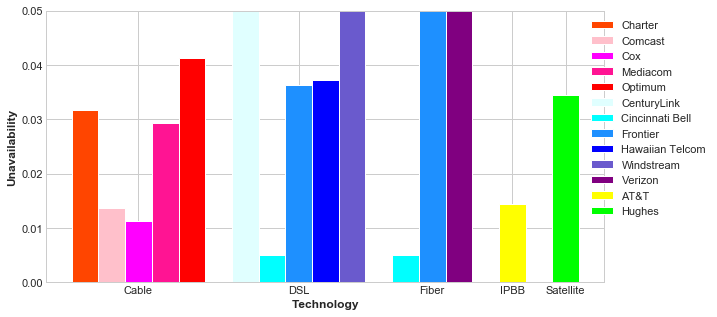

In [45]:
# set width of bar
barWidth = 0.25
 
# set height of bar
Charter = get6_tech_isp.loc[get6_tech_isp['ISP'] == 'Charter']['unavailability'].tolist()
Comcast = get6_tech_isp.loc[get6_tech_isp['ISP'] == 'Comcast']['unavailability'].tolist()
Cox = get6_tech_isp.loc[get6_tech_isp['ISP'] == 'Cox']['unavailability'].tolist()
Mediacom = get6_tech_isp.loc[get6_tech_isp['ISP'] == 'Mediacom']['unavailability'].tolist()
Optimum = get6_tech_isp.loc[get6_tech_isp['ISP'] == 'Optimum']['unavailability'].tolist()
CenturyLink = get6_tech_isp.loc[get6_tech_isp['ISP'] == 'CenturyLink']['unavailability'].tolist()
Cincinnati_Bell = get6_tech_isp.loc[get6_tech_isp['ISP'] == 'Cincinnati Bell']['unavailability'].tolist()
Frontier = get6_tech_isp.loc[get6_tech_isp['ISP'] == 'Frontier']['unavailability'].tolist()
Hawaiian_Telcom = get6_tech_isp.loc[get6_tech_isp['ISP'] == 'Hawaiian Telcom']['unavailability'].tolist()
Windstream = get6_tech_isp.loc[get6_tech_isp['ISP'] == 'Windstream']['unavailability'].tolist()
Verizon = get6_tech_isp.loc[get6_tech_isp['ISP'] == 'Verizon']['unavailability'].tolist()
ATT = get6_tech_isp.loc[get6_tech_isp['ISP'] == 'AT&T']['unavailability'].tolist()
Hughes = get6_tech_isp.loc[get6_tech_isp['ISP'] == 'Hughes']['unavailability'].tolist()
 
# Set position of bar on X axis
# Cable
Charter_loc = [0]
Comcast_loc = [Charter_loc[0] + barWidth]
Cox_loc = [Charter_loc[0] + 2 * barWidth]
Mediacom_loc = [Charter_loc[0] + 3 * barWidth]
Optimum_loc = [Charter_loc[0] + 4 * barWidth]

# DSL (including Fiber)
CenturyLink_loc = [Charter_loc[0] + 6 * barWidth]
Cincinnati_Bell_loc = [Charter_loc[0] + 7 * barWidth, Charter_loc[0] + 12 * barWidth]
Frontier_loc = [Charter_loc[0] + 8 * barWidth, Charter_loc[0] + 13 * barWidth]
Hawaiian_Telcom_loc = [Charter_loc[0] + 9 * barWidth]
Windstream_loc = [Charter_loc[0] + 10 * barWidth]

# Fiber
Verizon_loc = [Charter_loc[0] + 14 * barWidth]

# IPBB
ATT_loc = [Charter_loc[0] + 16 * barWidth]

# satellite
Hughes_loc = [Charter_loc[0] + 18 * barWidth]
 
# Make the plot

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 5))
_ = plt.bar(Charter_loc, Charter, color='orangered', width=barWidth, edgecolor='white', label='Charter')
_ = plt.bar(Comcast_loc, Comcast, color='pink', width=barWidth, edgecolor='white', label='Comcast')
_ = plt.bar(Cox_loc, Cox, color='fuchsia', width=barWidth, edgecolor='white', label='Cox')
_ = plt.bar(Mediacom_loc, Mediacom, color='deeppink', width=barWidth, edgecolor='white', label='Mediacom')
_ = plt.bar(Optimum_loc, Optimum, color='red', width=barWidth, edgecolor='white', label='Optimum')
_ = plt.bar(CenturyLink_loc, CenturyLink, color='lightcyan', width=barWidth, edgecolor='white', label='CenturyLink')
_ = plt.bar(Cincinnati_Bell_loc, Cincinnati_Bell, color='cyan', width=barWidth, edgecolor='white', label='Cincinnati Bell')
_ = plt.bar(Frontier_loc, Frontier, color='dodgerblue', width=barWidth, edgecolor='white', label='Frontier')
_ = plt.bar(Hawaiian_Telcom_loc, Hawaiian_Telcom, color='blue', width=barWidth, edgecolor='white', label='Hawaiian Telcom')
_ = plt.bar(Windstream_loc, Windstream, color='slateblue', width=barWidth, edgecolor='white', label='Windstream')
_ = plt.bar(Verizon_loc, Verizon, color='purple', width=barWidth, edgecolor='white', label='Verizon')
_ = plt.bar(ATT_loc, ATT, color='yellow', width=barWidth, edgecolor='white', label='AT&T')
_ = plt.bar(Hughes_loc, Hughes, color='lime', width=barWidth, edgecolor='white', label='Hughes')
 
# Add xticks on the middle of the group bars
_ = plt.xlabel('Technology', fontweight='bold')
_ = plt.ylabel('Unavailability', fontweight='bold')
_ = plt.ylim((0,0.05))
_ = plt.xticks([0.5, 2, 3.25, 4, 4.5], ['Cable', 'DSL', 'Fiber', 'IPBB', 'Satellite'])
 
# Create legend & Show graphic
_ = plt.legend(bbox_to_anchor=(1.2, 1), shadow = True)

In [36]:
get6_tier = get6_bynode_ava[['availability', 'Technology', 'Download']].groupby(['Technology', 'Download']).mean()
get6_tier['availability'] = round(get6_tier['availability'] * 100, 2)
get6_tier

availability
Technology Download              
Cable      20.0             93.94
           25.0             98.70
           30.0             95.34
           40.0             87.50
           50.0             98.07
           60.0             96.44
           75.0             97.97
           100.0            97.87
           101.0            93.76
           105.0            96.34
           150.0            99.21
           200.0            98.84
           250.0            99.86
           300.0            98.60
DSL        3.0              89.23
           6.0              99.54
           7.0              98.15
           8.0              89.59
           10.0             88.41
           12.0             95.07
           20.0             96.14
           30.0             99.49
           40.0             99.95
Fiber      25.0             98.05
           75.0             88.29
           100.0            93.32
IPBB       1.5              98.76
           3.0              98.59
           5.0              99.79
           6.0              99.12
           10.0             99.84
           12.0             98.21
           18.0             98.77
           24.0             97.22
           45.0             98.93
Satellite  5.0              95.09
           10.0             98.01
           25.0             96.29

#### IPV4 Upload

In [39]:
curr_httppostmt_fill = merge_byhour[['unit_id', 'dtime', 'successes_up4']]
curr_httppostmt_fill.columns = ['unit_id', 'dtime', 'successes']
curr_httppostmt_fill['successes'].fillna(1, inplace = True)
curr_httppostmt_fill = curr_httppostmt_fill[['unit_id', 'successes']]
post4_bynode_ava = curr_httppostmt_fill.groupby('unit_id').sum()
max_ava = max(post4_bynode_ava['successes'])
post4_bynode_ava['availability'] = post4_bynode_ava['successes'] / max_ava
post4_bynode_ava['unavailability'] = 1 - post4_bynode_ava['availability']
post4_bynode_ava = post4_bynode_ava[['availability', 'unavailability']]
post4_bynode_ava.reset_index('unit_id', inplace = True)

# merge with unit profile
post4_bynode_ava = post4_bynode_ava.merge(geo_up, how = 'inner', left_on = 'unit_id', right_on = 'unit_id')
post4_bynode_ava = post4_bynode_ava[['unit_id', 'availability', 'unavailability', 'ISP', 'Technology', 'State', 'Upload']]
post4_bynode_ava.head()

,unit_id,availability,unavailability,ISP,Technology,State,Upload
0,1165,0.999079,0.000921,Verizon,Fiber,VA,75.0
1,5308,0.999079,0.000921,Comcast,Cable,IL,10.0
2,5321,0.999770,0.000230,Charter,Cable,NC,5.0
3,5436,0.999770,0.000230,Charter,Cable,NH,10.0
4,5714,0.998619,0.001381,Charter,Cable,SC,2.0


In [40]:
post4_bynode_ava['availability'].describe()

count    651.000000
mean       0.986646
std        0.051287
min        0.683011
25%        0.996547
50%        0.998849
75%        0.999540
max        1.000000
Name: availability, dtype: float64

In [41]:
# explore the nodes having extremely low availability
print('Explore the nodes having extremely low availability:')
print('Percentage of nodes availability < 0.9: ' + \
      str(round(len(post4_bynode_ava[post4_bynode_ava['availability'] < 0.9]) * 100/len(post4_bynode_ava), 3)) + '%')
print('Percentage of nodes availability < 0.95: ' + \
      str(round(len(post4_bynode_ava[post4_bynode_ava['availability'] < 0.95]) * 100/len(post4_bynode_ava), 3)) + '%')
print('Percentage of nodes availability < 0.98: ' + \
      str(round(len(post4_bynode_ava[post4_bynode_ava['availability'] < 0.98]) * 100/len(post4_bynode_ava), 3)) + '%')
print('Percentage of nodes availability < 0.99: '+ \
      str(round(len(post4_bynode_ava[post4_bynode_ava['availability'] < 0.99]) * 100/len(post4_bynode_ava), 3)) + '%')

Explore the nodes having extremely low availability:
Percentage of nodes availability < 0.9: 3.84%
Percentage of nodes availability < 0.95: 4.455%
Percentage of nodes availability < 0.98: 7.066%
Percentage of nodes availability < 0.99: 11.06%


In [42]:
# explore the characteristics of normal nodes
post4_tech_isp = post4_bynode_ava[['availability', 'Technology', 'ISP']].groupby(['Technology', 'ISP']).mean()
post4_tech_isp.reset_index(['Technology', 'ISP'], inplace = True)
post4_tech_isp['unavailability'] = 1 - post4_tech_isp['availability']
post4_tech_isp.sort_values(by = ['Technology', 'ISP'], ascending = True, inplace = True)
post4_tech_isp

,Technology,ISP,availability,unavailability
0,Cable,Charter,0.997783,0.002217
1,Cable,Comcast,0.997599,0.002401
2,Cable,Cox,0.998402,0.001598
3,Cable,Mediacom,0.983685,0.016315
4,Cable,Optimum,0.997756,0.002244
5,DSL,CenturyLink,0.995006,0.004994
6,DSL,Cincinnati Bell,0.999770,0.000230
7,DSL,Frontier,0.996010,0.003990
8,DSL,Hawaiian Telcom,0.991943,0.008057
9,DSL,Windstream,0.997775,0.002225


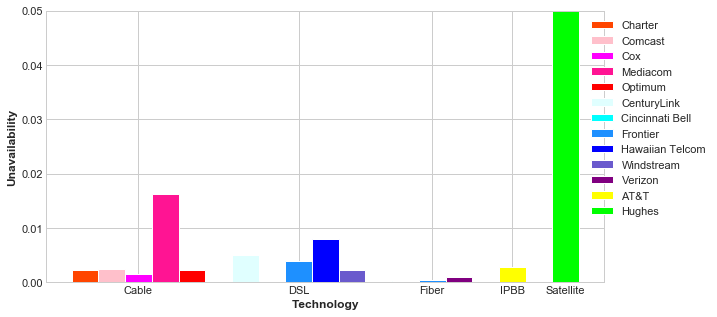

In [46]:
# set width of bar
barWidth = 0.25
 
# set height of bar
Charter = post4_tech_isp.loc[post4_tech_isp['ISP'] == 'Charter']['unavailability'].tolist()
Comcast = post4_tech_isp.loc[post4_tech_isp['ISP'] == 'Comcast']['unavailability'].tolist()
Cox = post4_tech_isp.loc[post4_tech_isp['ISP'] == 'Cox']['unavailability'].tolist()
Mediacom = post4_tech_isp.loc[post4_tech_isp['ISP'] == 'Mediacom']['unavailability'].tolist()
Optimum = post4_tech_isp.loc[post4_tech_isp['ISP'] == 'Optimum']['unavailability'].tolist()
CenturyLink = post4_tech_isp.loc[post4_tech_isp['ISP'] == 'CenturyLink']['unavailability'].tolist()
Cincinnati_Bell = post4_tech_isp.loc[post4_tech_isp['ISP'] == 'Cincinnati Bell']['unavailability'].tolist()
Frontier = post4_tech_isp.loc[post4_tech_isp['ISP'] == 'Frontier']['unavailability'].tolist()
Hawaiian_Telcom = post4_tech_isp.loc[post4_tech_isp['ISP'] == 'Hawaiian Telcom']['unavailability'].tolist()
Windstream = post4_tech_isp.loc[post4_tech_isp['ISP'] == 'Windstream']['unavailability'].tolist()
Verizon = post4_tech_isp.loc[post4_tech_isp['ISP'] == 'Verizon']['unavailability'].tolist()
ATT = post4_tech_isp.loc[post4_tech_isp['ISP'] == 'AT&T']['unavailability'].tolist()
Hughes = post4_tech_isp.loc[post4_tech_isp['ISP'] == 'Hughes']['unavailability'].tolist()
 
# Set position of bar on X axis
# Cable
Charter_loc = [0]
Comcast_loc = [Charter_loc[0] + barWidth]
Cox_loc = [Charter_loc[0] + 2 * barWidth]
Mediacom_loc = [Charter_loc[0] + 3 * barWidth]
Optimum_loc = [Charter_loc[0] + 4 * barWidth]

# DSL (including Fiber)
CenturyLink_loc = [Charter_loc[0] + 6 * barWidth]
Cincinnati_Bell_loc = [Charter_loc[0] + 7 * barWidth, Charter_loc[0] + 12 * barWidth]
Frontier_loc = [Charter_loc[0] + 8 * barWidth, Charter_loc[0] + 13 * barWidth]
Hawaiian_Telcom_loc = [Charter_loc[0] + 9 * barWidth]
Windstream_loc = [Charter_loc[0] + 10 * barWidth]

# Fiber
Verizon_loc = [Charter_loc[0] + 14 * barWidth]

# IPBB
ATT_loc = [Charter_loc[0] + 16 * barWidth]

# satellite
Hughes_loc = [Charter_loc[0] + 18 * barWidth]
 
# Make the plot

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 5))
_ = plt.bar(Charter_loc, Charter, color='orangered', width=barWidth, edgecolor='white', label='Charter')
_ = plt.bar(Comcast_loc, Comcast, color='pink', width=barWidth, edgecolor='white', label='Comcast')
_ = plt.bar(Cox_loc, Cox, color='fuchsia', width=barWidth, edgecolor='white', label='Cox')
_ = plt.bar(Mediacom_loc, Mediacom, color='deeppink', width=barWidth, edgecolor='white', label='Mediacom')
_ = plt.bar(Optimum_loc, Optimum, color='red', width=barWidth, edgecolor='white', label='Optimum')
_ = plt.bar(CenturyLink_loc, CenturyLink, color='lightcyan', width=barWidth, edgecolor='white', label='CenturyLink')
_ = plt.bar(Cincinnati_Bell_loc, Cincinnati_Bell, color='cyan', width=barWidth, edgecolor='white', label='Cincinnati Bell')
_ = plt.bar(Frontier_loc, Frontier, color='dodgerblue', width=barWidth, edgecolor='white', label='Frontier')
_ = plt.bar(Hawaiian_Telcom_loc, Hawaiian_Telcom, color='blue', width=barWidth, edgecolor='white', label='Hawaiian Telcom')
_ = plt.bar(Windstream_loc, Windstream, color='slateblue', width=barWidth, edgecolor='white', label='Windstream')
_ = plt.bar(Verizon_loc, Verizon, color='purple', width=barWidth, edgecolor='white', label='Verizon')
_ = plt.bar(ATT_loc, ATT, color='yellow', width=barWidth, edgecolor='white', label='AT&T')
_ = plt.bar(Hughes_loc, Hughes, color='lime', width=barWidth, edgecolor='white', label='Hughes')
 
# Add xticks on the middle of the group bars
_ = plt.xlabel('Technology', fontweight='bold')
_ = plt.ylim((0,0.05))
_ = plt.ylabel('Unavailability', fontweight='bold')
_ = plt.xticks([0.5, 2, 3.25, 4, 4.5], ['Cable', 'DSL', 'Fiber', 'IPBB', 'Satellite'])
 
# Create legend & Show graphic
_ = plt.legend(bbox_to_anchor=(1.2, 1), shadow = True)

In [47]:
post4_tier = post4_bynode_ava[['availability', 'Technology', 'Upload']].groupby(['Technology', 'Upload']).mean()
post4_tier['availability'] = round(post4_tier['availability'] * 100, 2)
post4_tier

availability
Technology Upload               
Cable      2.000           99.91
           5.000           99.39
           10.000          99.75
           20.000          99.77
           35.000          99.81
DSL        0.384           99.19
           0.640           98.60
           0.768           99.77
           0.896           99.26
           1.000           99.53
           1.500           99.91
           2.000          100.00
           3.000           99.98
           5.000           99.94
Fiber      25.000          99.93
           75.000          99.95
           100.000         99.91
IPBB       0.384           97.82
           0.512           98.91
           0.768           99.59
           1.000           99.82
           1.500           99.92
           3.000           99.91
           6.000           99.83
Satellite  1.000           92.99
           3.000           78.76

#### IPV6 Upload

In [48]:
curr_httppostmt6_fill = merge_byhour[['unit_id', 'dtime', 'successes_up6']]
curr_httppostmt6_fill.columns = ['unit_id', 'dtime', 'successes']
curr_httppostmt6_fill['successes'].fillna(1, inplace = True)
curr_httppostmt6_fill = curr_httppostmt6_fill[['unit_id', 'successes']]
post6_bynode_ava = curr_httppostmt6_fill.groupby('unit_id').sum()
max_ava = max(post6_bynode_ava['successes'])
post6_bynode_ava['availability'] = post6_bynode_ava['successes'] / max_ava
post6_bynode_ava['unavailability'] = 1 - post6_bynode_ava['availability']
post6_bynode_ava = post6_bynode_ava[['availability', 'unavailability']]
post6_bynode_ava.reset_index('unit_id', inplace = True)

# merge with unit profile
post6_bynode_ava = post6_bynode_ava.merge(geo_up, how = 'inner', left_on = 'unit_id', right_on = 'unit_id')
post6_bynode_ava = post6_bynode_ava[['unit_id', 'availability', 'unavailability', 'ISP', 'Technology', 'State', 'Upload']]
post6_bynode_ava.head()

,unit_id,availability,unavailability,ISP,Technology,State,Upload
0,1165,0.878453,0.121547,Verizon,Fiber,VA,75.0
1,5308,0.877532,0.122468,Comcast,Cable,IL,10.0
2,5321,0.875000,0.125000,Charter,Cable,NC,5.0
3,5436,0.962247,0.037753,Charter,Cable,NH,10.0
4,5714,0.906077,0.093923,Charter,Cable,SC,2.0


In [49]:
post6_bynode_ava['availability'].describe()

count    651.000000
mean       0.977328
std        0.035315
min        0.875000
25%        0.969959
50%        0.995166
75%        0.999309
max        1.000000
Name: availability, dtype: float64

In [50]:
# explore the nodes having extremely low availability
print('Explore the nodes having extremely low availability:')
print('Percentage of nodes availability < 0.9: ' + \
      str(round(len(post6_bynode_ava[post6_bynode_ava['availability'] < 0.9]) * 100/len(post6_bynode_ava), 3)) + '%')
print('Percentage of nodes availability < 0.95: ' + \
      str(round(len(post6_bynode_ava[post6_bynode_ava['availability'] < 0.95]) * 100/len(post6_bynode_ava), 3)) + '%')
print('Percentage of nodes availability < 0.98: ' + \
      str(round(len(post6_bynode_ava[post6_bynode_ava['availability'] < 0.98]) * 100/len(post6_bynode_ava), 3)) + '%')
print('Percentage of nodes availability < 0.99: '+ \
      str(round(len(post6_bynode_ava[post6_bynode_ava['availability'] < 0.99]) * 100/len(post6_bynode_ava), 3)) + '%')

Explore the nodes having extremely low availability:
Percentage of nodes availability < 0.9: 8.295%
Percentage of nodes availability < 0.95: 14.9%
Percentage of nodes availability < 0.98: 30.568%
Percentage of nodes availability < 0.99: 39.631%


In [51]:
# explore the characteristics of normal nodes
post6_tech_isp = post6_bynode_ava[['availability', 'Technology', 'ISP']].groupby(['Technology', 'ISP']).mean()
post6_tech_isp.reset_index(['Technology', 'ISP'], inplace = True)
post6_tech_isp['unavailability'] = 1 - post6_tech_isp['availability']
post6_tech_isp.sort_values(by = ['Technology', 'ISP'], ascending = True, inplace = True)
post6_tech_isp

,Technology,ISP,availability,unavailability
0,Cable,Charter,0.968157,0.031843
1,Cable,Comcast,0.985989,0.014011
2,Cable,Cox,0.988605,0.011395
3,Cable,Mediacom,0.969814,0.030186
4,Cable,Optimum,0.957297,0.042703
5,DSL,CenturyLink,0.946097,0.053903
6,DSL,Cincinnati Bell,0.994936,0.005064
7,DSL,Frontier,0.964242,0.035758
8,DSL,Hawaiian Telcom,0.964779,0.035221
9,DSL,Windstream,0.920427,0.079573


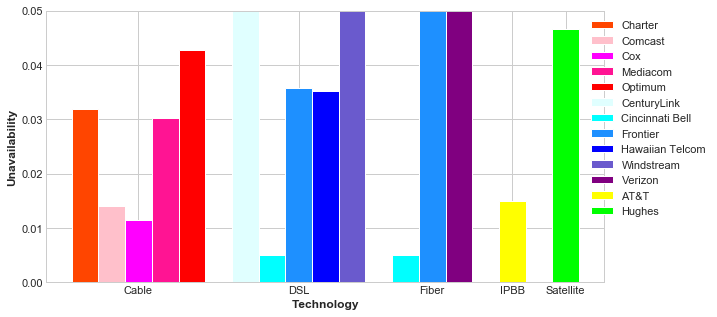

In [52]:
# set width of bar
barWidth = 0.25
 
# set height of bar
Charter = post6_tech_isp.loc[post6_tech_isp['ISP'] == 'Charter']['unavailability'].tolist()
Comcast = post6_tech_isp.loc[post6_tech_isp['ISP'] == 'Comcast']['unavailability'].tolist()
Cox = post6_tech_isp.loc[post6_tech_isp['ISP'] == 'Cox']['unavailability'].tolist()
Mediacom = post6_tech_isp.loc[post6_tech_isp['ISP'] == 'Mediacom']['unavailability'].tolist()
Optimum = post6_tech_isp.loc[post6_tech_isp['ISP'] == 'Optimum']['unavailability'].tolist()
CenturyLink = post6_tech_isp.loc[post6_tech_isp['ISP'] == 'CenturyLink']['unavailability'].tolist()
Cincinnati_Bell = post6_tech_isp.loc[post6_tech_isp['ISP'] == 'Cincinnati Bell']['unavailability'].tolist()
Frontier = post6_tech_isp.loc[post6_tech_isp['ISP'] == 'Frontier']['unavailability'].tolist()
Hawaiian_Telcom = post6_tech_isp.loc[post6_tech_isp['ISP'] == 'Hawaiian Telcom']['unavailability'].tolist()
Windstream = post6_tech_isp.loc[post6_tech_isp['ISP'] == 'Windstream']['unavailability'].tolist()
Verizon = post6_tech_isp.loc[post6_tech_isp['ISP'] == 'Verizon']['unavailability'].tolist()
ATT = post6_tech_isp.loc[post6_tech_isp['ISP'] == 'AT&T']['unavailability'].tolist()
Hughes = post6_tech_isp.loc[post6_tech_isp['ISP'] == 'Hughes']['unavailability'].tolist()
#WildblueViaSat = post6_tech_isp.loc[post6_tech_isp['ISP'] == 'Wildblue/ViaSat']['unavailability'].tolist()
 
# Set position of bar on X axis
# Cable
Charter_loc = [0]
Comcast_loc = [Charter_loc[0] + barWidth]
Cox_loc = [Charter_loc[0] + 2 * barWidth]
Mediacom_loc = [Charter_loc[0] + 3 * barWidth]
Optimum_loc = [Charter_loc[0] + 4 * barWidth]

# DSL (including Fiber)
CenturyLink_loc = [Charter_loc[0] + 6 * barWidth]
Cincinnati_Bell_loc = [Charter_loc[0] + 7 * barWidth, Charter_loc[0] + 12 * barWidth]
Frontier_loc = [Charter_loc[0] + 8 * barWidth, Charter_loc[0] + 13 * barWidth]
Hawaiian_Telcom_loc = [Charter_loc[0] + 9 * barWidth]
Windstream_loc = [Charter_loc[0] + 10 * barWidth]

# Fiber
Verizon_loc = [Charter_loc[0] + 14 * barWidth]

# IPBB
ATT_loc = [Charter_loc[0] + 16 * barWidth]

# satellite
Hughes_loc = [Charter_loc[0] + 18 * barWidth]
#WildblueViaSat_loc = [Charter_loc[0] + 19 * barWidth]
 
# Make the plot

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 5))
_ = plt.bar(Charter_loc, Charter, color='orangered', width=barWidth, edgecolor='white', label='Charter')
_ = plt.bar(Comcast_loc, Comcast, color='pink', width=barWidth, edgecolor='white', label='Comcast')
_ = plt.bar(Cox_loc, Cox, color='fuchsia', width=barWidth, edgecolor='white', label='Cox')
_ = plt.bar(Mediacom_loc, Mediacom, color='deeppink', width=barWidth, edgecolor='white', label='Mediacom')
_ = plt.bar(Optimum_loc, Optimum, color='red', width=barWidth, edgecolor='white', label='Optimum')
_ = plt.bar(CenturyLink_loc, CenturyLink, color='lightcyan', width=barWidth, edgecolor='white', label='CenturyLink')
_ = plt.bar(Cincinnati_Bell_loc, Cincinnati_Bell, color='cyan', width=barWidth, edgecolor='white', label='Cincinnati Bell')
_ = plt.bar(Frontier_loc, Frontier, color='dodgerblue', width=barWidth, edgecolor='white', label='Frontier')
_ = plt.bar(Hawaiian_Telcom_loc, Hawaiian_Telcom, color='blue', width=barWidth, edgecolor='white', label='Hawaiian Telcom')
_ = plt.bar(Windstream_loc, Windstream, color='slateblue', width=barWidth, edgecolor='white', label='Windstream')
_ = plt.bar(Verizon_loc, Verizon, color='purple', width=barWidth, edgecolor='white', label='Verizon')
_ = plt.bar(ATT_loc, ATT, color='yellow', width=barWidth, edgecolor='white', label='AT&T')
_ = plt.bar(Hughes_loc, Hughes, color='lime', width=barWidth, edgecolor='white', label='Hughes')
#_ = plt.bar(WildblueViaSat_loc, WildblueViaSat, color='greenyellow', width=barWidth, edgecolor='white', label='Wildblue/ViaSat')
 
# Add xticks on the middle of the group bars
_ = plt.xlabel('Technology', fontweight='bold')
_ = plt.ylim((0,0.05))
_ = plt.ylabel('Unavailability', fontweight='bold')
_ = plt.xticks([0.5, 2, 3.25, 4, 4.5], ['Cable', 'DSL', 'Fiber', 'IPBB', 'Satellite'])
 
# Create legend & Show graphic
_ = plt.legend(bbox_to_anchor=(1.2, 1), shadow = True)

In [53]:
post6_tier = post6_bynode_ava[['availability', 'Technology', 'Upload']].groupby(['Technology', 'Upload']).mean()
post6_tier['availability'] = round(post6_tier['availability'] * 100, 2)
post6_tier

availability
Technology Upload               
Cable      2.000           96.31
           5.000           97.28
           10.000          98.41
           20.000          97.67
           35.000          96.57
DSL        0.384           90.65
           0.640           87.55
           0.768           92.15
           0.896           97.48
           1.000           97.55
           1.500           87.52
           2.000           93.26
           3.000           99.49
           5.000           99.95
Fiber      25.000          98.20
           75.000          88.29
           100.000         93.33
IPBB       0.384           98.25
           0.512           98.13
           0.768           99.01
           1.000           98.74
           1.500           98.63
           3.000           97.18
           6.000           98.96
Satellite  1.000           97.87
           3.000           92.11

##### 4.  How availability change over time?

In [56]:
merge_byhour.fillna(1, inplace = True)
merge_byhour.head()

,unit_id,dtime,successes_down4,successes_down6,successes_up4,successes_up6
0,723,2018-01-01 00:00:00,1.0,1.0,1.0,1.0
1,723,2018-01-01 01:00:00,1.0,1.0,1.0,1.0
2,723,2018-01-01 02:00:00,1.0,1.0,1.0,1.0
3,723,2018-01-01 03:00:00,1.0,1.0,1.0,1.0
4,723,2018-01-01 04:00:00,1.0,1.0,1.0,1.0


In [67]:
merge_time = merge_byhour.merge(geo_down, how = 'inner', left_on = 'unit_id', right_on = 'unit_id')\
                [['dtime', 'successes_down4', 'successes_down6', 'successes_up4', 'successes_up6', 'ISP', 'Technology']]
merge_time['ISP&Technology'] = merge_time['ISP'] + ' ' + merge_time['Technology']
merge_time = merge_time.groupby([merge_time.dtime.dt.date, merge_time['ISP&Technology']]).mean()
merge_time['successes_down4'] = 1 - merge_time['successes_down4']
merge_time['successes_down6'] = 1 - merge_time['successes_down6']
merge_time['successes_up4'] = 1 - merge_time['successes_up4']
merge_time['successes_up6'] = 1 - merge_time['successes_up6']
merge_time_down4 = merge_time[['successes_down4']]
merge_time_down6 = merge_time[['successes_down6']]
merge_time_up4 = merge_time[['successes_up4']]
merge_time_up6 = merge_time[['successes_up6']]
merge_time.reset_index(['dtime', 'ISP&Technology'], inplace = True)

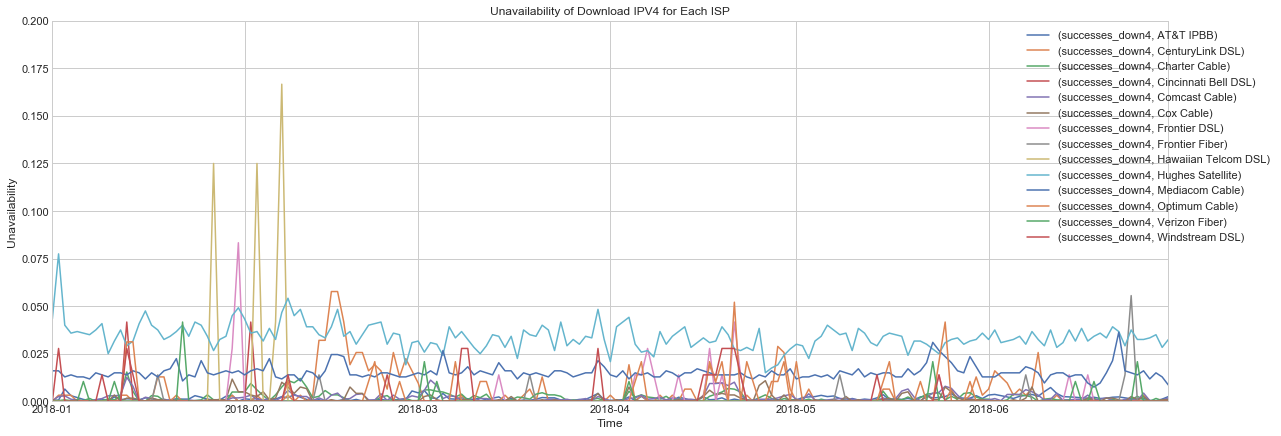

In [85]:
fig, ax = plt.subplots(figsize=(20,7))
_ = merge_time_down4.unstack().plot(ax=ax)
_ = ax.set_xlabel('Time')
_ = ax.set_ylabel('Unavailability')
_ = ax.set_ylim((0, 0.2))
_ = ax.set_title('Unavailability of Download IPV4 for Each ISP')
_ = ax.legend(bbox_to_anchor=(1.1, 1), shadow = True)

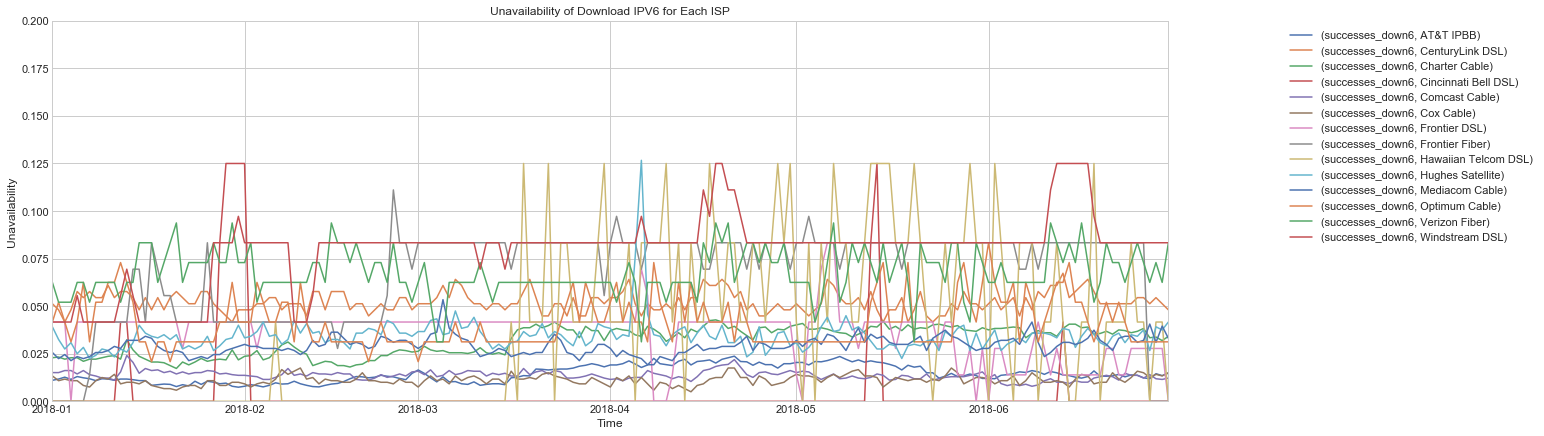

In [84]:
fig, ax = plt.subplots(figsize=(20,7))
_ = merge_time_down6.unstack().plot(ax=ax)
_ = ax.set_xlabel('Time')
_ = ax.set_ylabel('Unavailability')
_ = ax.set_ylim((0, 0.2))
_ = ax.set_title('Unavailability of Download IPV6 for Each ISP')
_ = ax.legend(bbox_to_anchor=(1.1, 1), shadow = True)

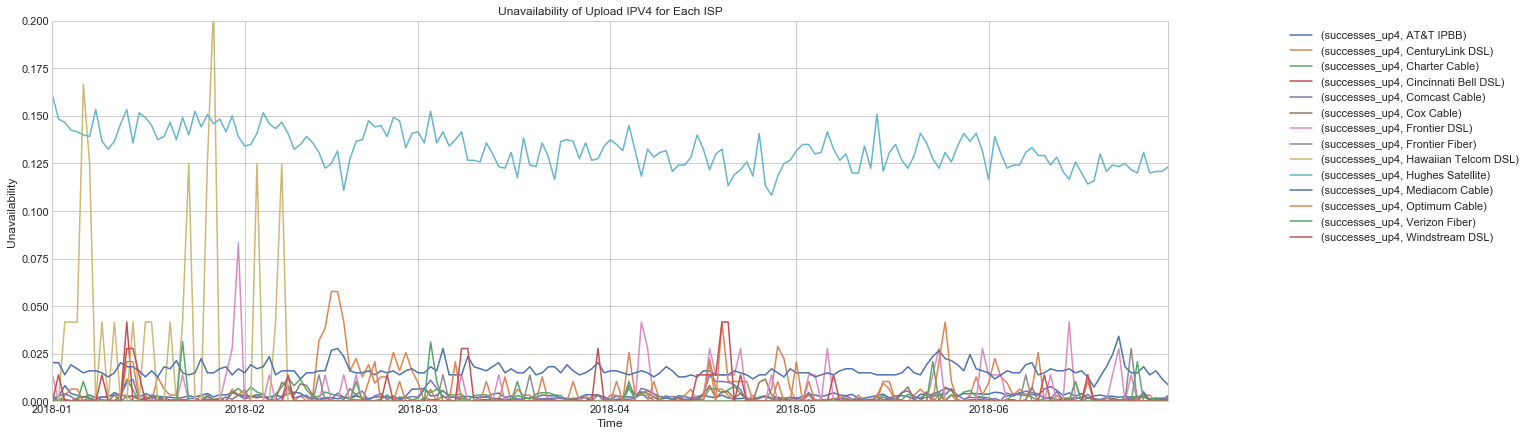

In [83]:
fig, ax = plt.subplots(figsize=(20,7))
_ = merge_time_up4.unstack().plot(ax=ax)
_ = ax.set_xlabel('Time')
_ = ax.set_ylabel('Unavailability')
_ = ax.set_ylim((0, 0.2))
_ = ax.set_title('Unavailability of Upload IPV4 for Each ISP')
_ = ax.legend(bbox_to_anchor=(1.1, 1), shadow = True)

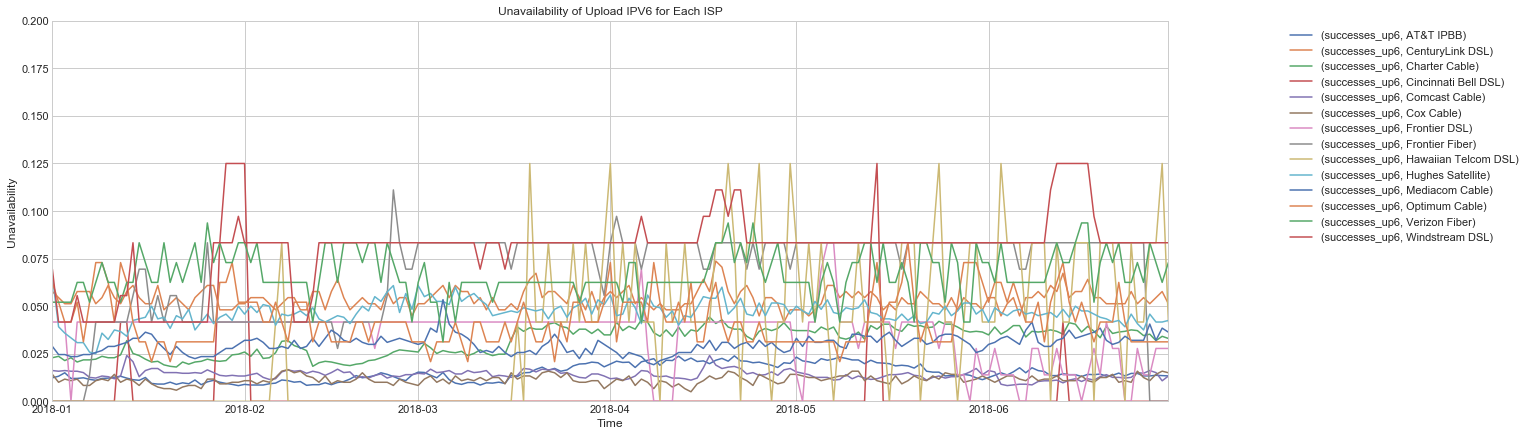

In [82]:
fig, ax = plt.subplots(figsize=(20,7))
_ = merge_time_up6.unstack().plot(ax=ax)
_ = ax.set_xlabel('Time')
_ = ax.set_ylabel('Unavailability')
_ = ax.set_ylim((0, 0.2))
_ = ax.set_title('Unavailability of Upload IPV6 for Each ISP')
_ = ax.legend(bbox_to_anchor=(1.1, 1), shadow = True)

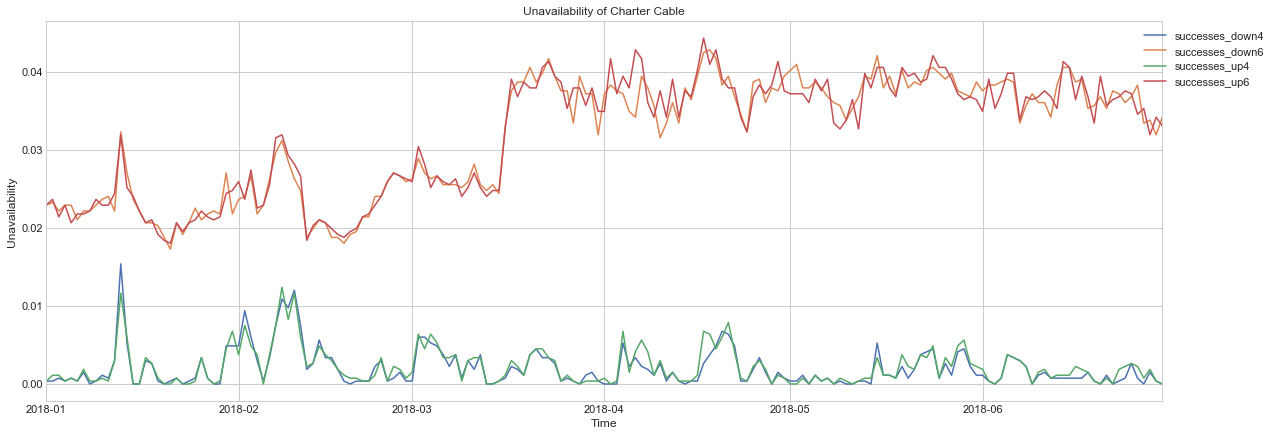

In [87]:
merge_time_Charter_Cable = merge_time.loc[merge_time['ISP&Technology'] == 'Charter Cable', \
                                ['dtime', 'successes_down4', 'successes_down6', 'successes_up4', 'successes_up6']]
merge_time_Charter_Cable.set_index('dtime', drop = True, inplace = True)
fig, ax = plt.subplots(figsize=(20,7))
_ = merge_time_Charter_Cable.plot(ax=ax)
_ = ax.set_xlabel('Time')
_ = ax.set_ylabel('Unavailability')
_ = ax.set_title('Unavailability of Charter Cable')
_ = ax.legend(bbox_to_anchor=(1.1, 1), shadow = True)

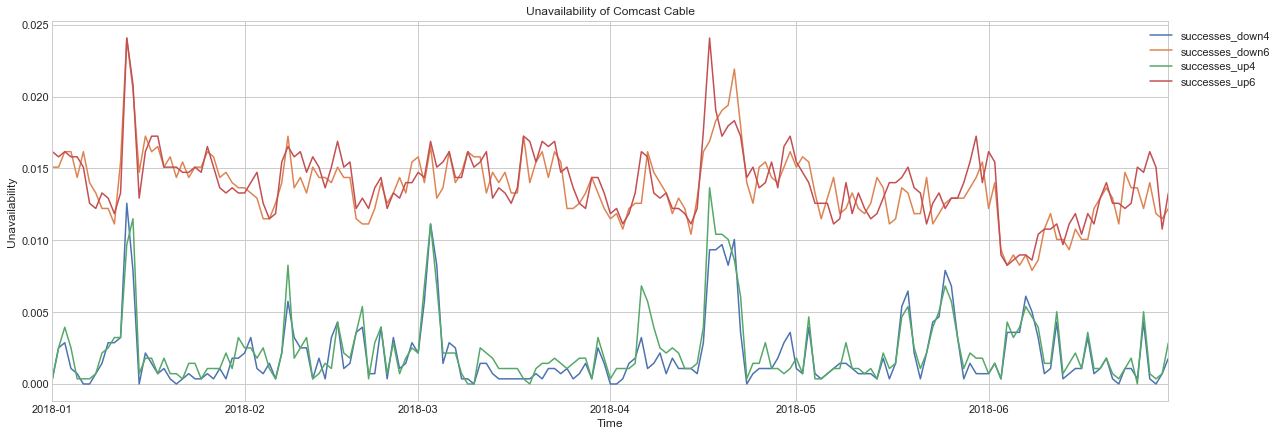

In [88]:
merge_time_Comcast_Cable = merge_time.loc[merge_time['ISP&Technology'] == 'Comcast Cable', \
                                ['dtime', 'successes_down4', 'successes_down6', 'successes_up4', 'successes_up6']]
merge_time_Comcast_Cable.set_index('dtime', drop = True, inplace = True)
fig, ax = plt.subplots(figsize=(20,7))
_ = merge_time_Comcast_Cable.plot(ax=ax)
_ = ax.set_xlabel('Time')
_ = ax.set_ylabel('Unavailability')
_ = ax.set_title('Unavailability of Comcast Cable')
_ = ax.legend(bbox_to_anchor=(1.1, 1), shadow = True)

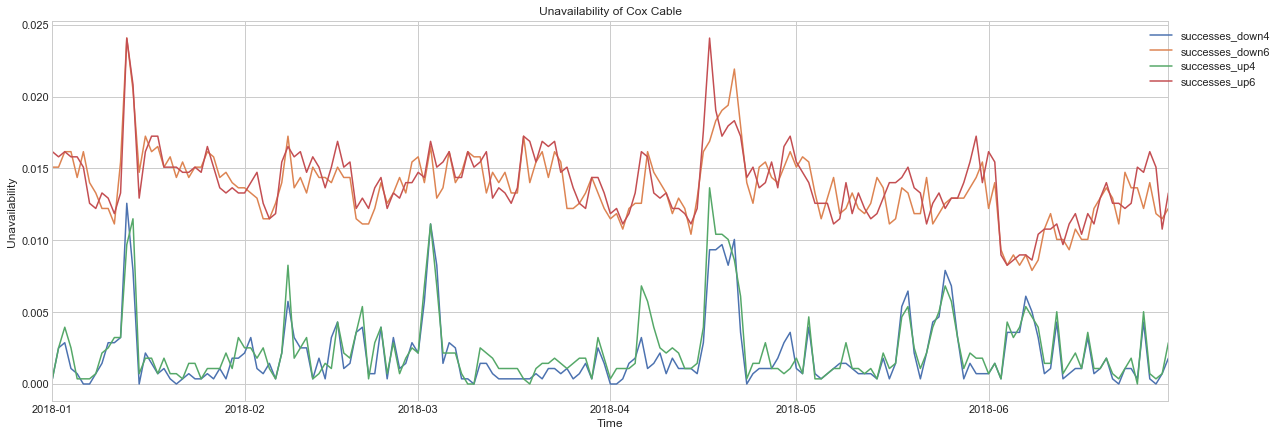

In [89]:
merge_time_Cox_Cable = merge_time.loc[merge_time['ISP&Technology'] == 'Cox Cable', \
                                ['dtime', 'successes_down4', 'successes_down6', 'successes_up4', 'successes_up6']]
merge_time_Cox_Cable.set_index('dtime', drop = True, inplace = True)
fig, ax = plt.subplots(figsize=(20,7))
_ = merge_time_Comcast_Cable.plot(ax=ax)
_ = ax.set_xlabel('Time')
_ = ax.set_ylabel('Unavailability')
_ = ax.set_title('Unavailability of Cox Cable')
_ = ax.legend(bbox_to_anchor=(1.1, 1), shadow = True)

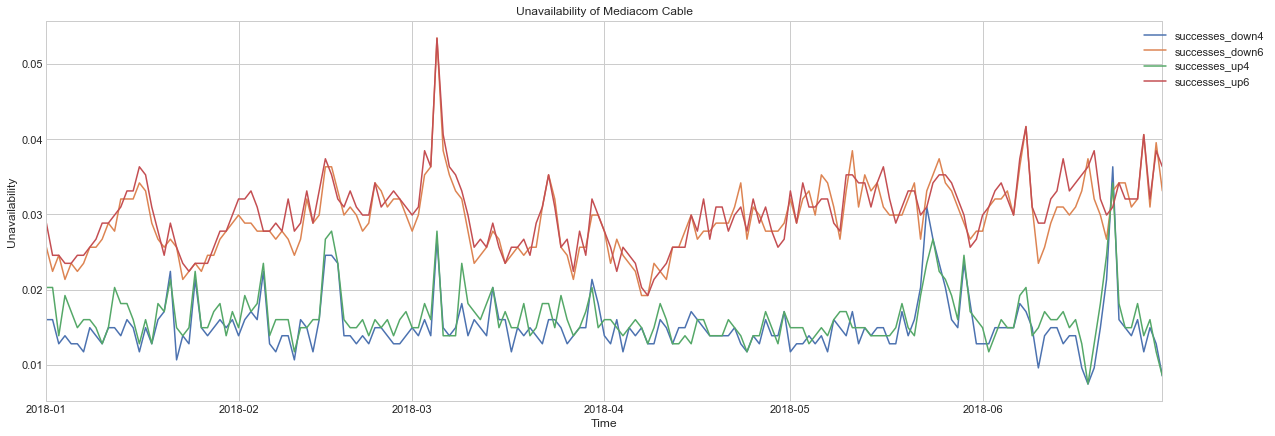

In [90]:
merge_time_Mediacom_Cable = merge_time.loc[merge_time['ISP&Technology'] == 'Mediacom Cable', \
                                ['dtime', 'successes_down4', 'successes_down6', 'successes_up4', 'successes_up6']]
merge_time_Mediacom_Cable.set_index('dtime', drop = True, inplace = True)
fig, ax = plt.subplots(figsize=(20,7))
_ = merge_time_Mediacom_Cable.plot(ax=ax)
_ = ax.set_xlabel('Time')
_ = ax.set_ylabel('Unavailability')
_ = ax.set_title('Unavailability of Mediacom Cable')
_ = ax.legend(bbox_to_anchor=(1.1, 1), shadow = True)

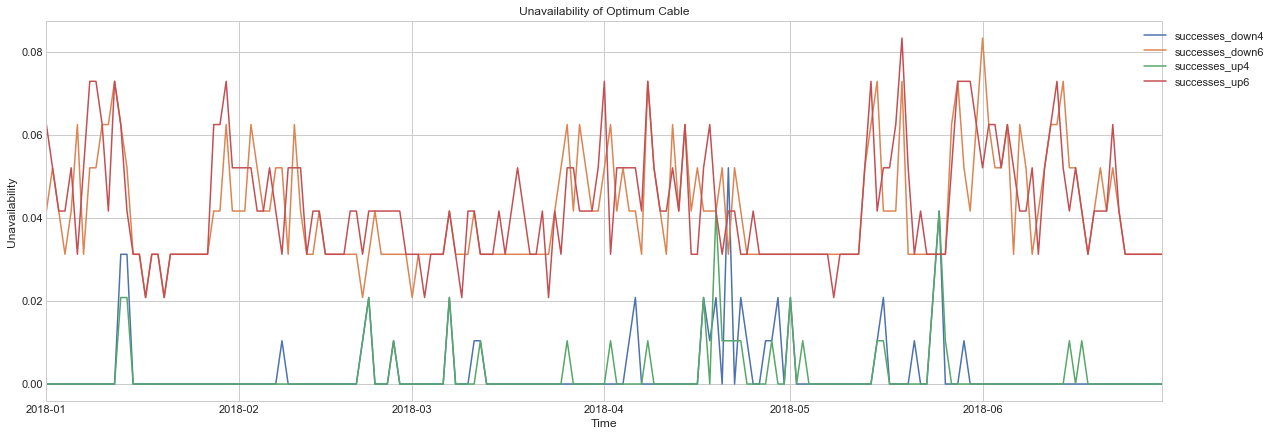

In [91]:
merge_time_Optimum_Cable = merge_time.loc[merge_time['ISP&Technology'] == 'Optimum Cable', \
                                ['dtime', 'successes_down4', 'successes_down6', 'successes_up4', 'successes_up6']]
merge_time_Optimum_Cable.set_index('dtime', drop = True, inplace = True)
fig, ax = plt.subplots(figsize=(20,7))
_ = merge_time_Optimum_Cable.plot(ax=ax)
_ = ax.set_xlabel('Time')
_ = ax.set_ylabel('Unavailability')
_ = ax.set_title('Unavailability of Optimum Cable')
_ = ax.legend(bbox_to_anchor=(1.1, 1), shadow = True)

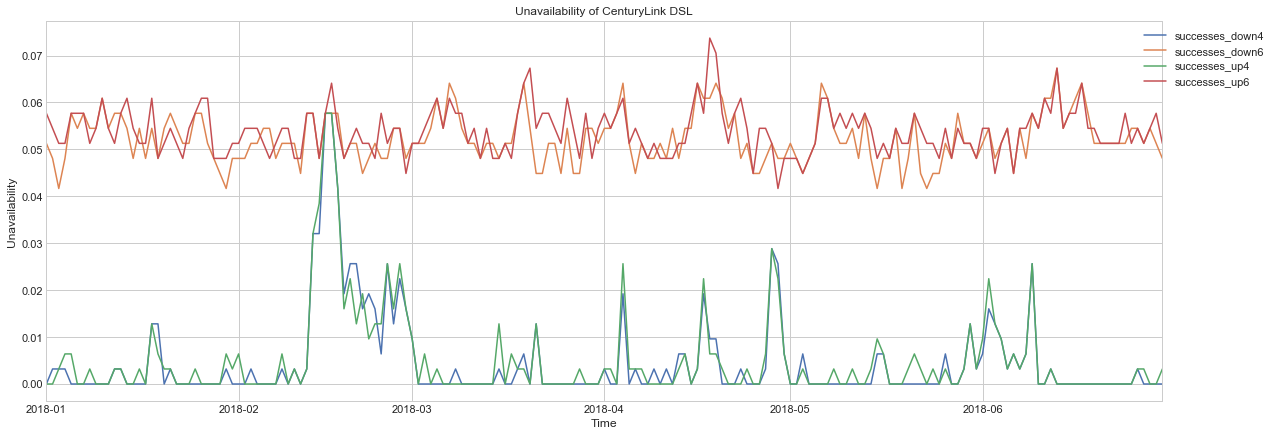

In [92]:
merge_time_CenturyLink_DSL = merge_time.loc[merge_time['ISP&Technology'] == 'CenturyLink DSL', \
                                ['dtime', 'successes_down4', 'successes_down6', 'successes_up4', 'successes_up6']]
merge_time_CenturyLink_DSL.set_index('dtime', drop = True, inplace = True)
fig, ax = plt.subplots(figsize=(20,7))
_ = merge_time_CenturyLink_DSL.plot(ax=ax)
_ = ax.set_xlabel('Time')
_ = ax.set_ylabel('Unavailability')
_ = ax.set_title('Unavailability of CenturyLink DSL')
_ = ax.legend(bbox_to_anchor=(1.1, 1), shadow = True)

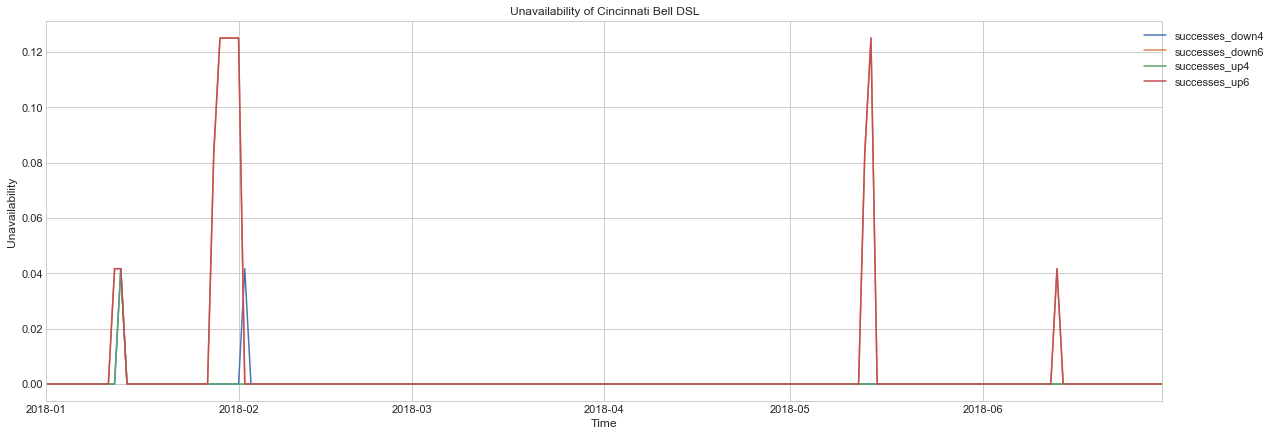

In [93]:
merge_time_Cincinnati_Bell_DSL = merge_time.loc[merge_time['ISP&Technology'] == 'Cincinnati Bell DSL', \
                                ['dtime', 'successes_down4', 'successes_down6', 'successes_up4', 'successes_up6']]
merge_time_Cincinnati_Bell_DSL.set_index('dtime', drop = True, inplace = True)
fig, ax = plt.subplots(figsize=(20,7))
_ = merge_time_Cincinnati_Bell_DSL.plot(ax=ax)
_ = ax.set_xlabel('Time')
_ = ax.set_ylabel('Unavailability')
_ = ax.set_title('Unavailability of Cincinnati Bell DSL')
_ = ax.legend(bbox_to_anchor=(1.1, 1), shadow = True)

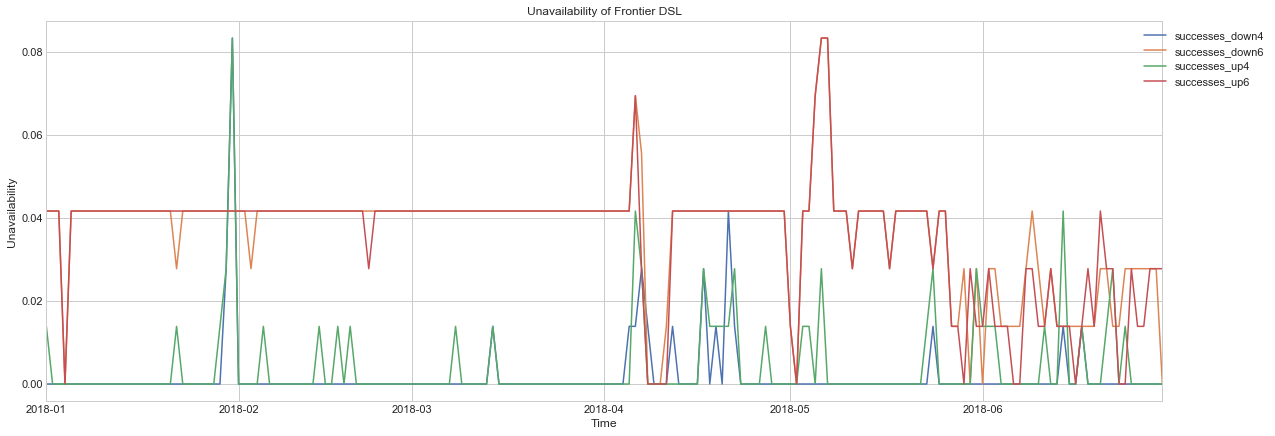

In [94]:
merge_time_Frontier_DSL = merge_time.loc[merge_time['ISP&Technology'] == 'Frontier DSL', \
                                ['dtime', 'successes_down4', 'successes_down6', 'successes_up4', 'successes_up6']]
merge_time_Frontier_DSL.set_index('dtime', drop = True, inplace = True)
fig, ax = plt.subplots(figsize=(20,7))
_ = merge_time_Frontier_DSL.plot(ax=ax)
_ = ax.set_xlabel('Time')
_ = ax.set_ylabel('Unavailability')
_ = ax.set_title('Unavailability of Frontier DSL')
_ = ax.legend(bbox_to_anchor=(1.1, 1), shadow = True)

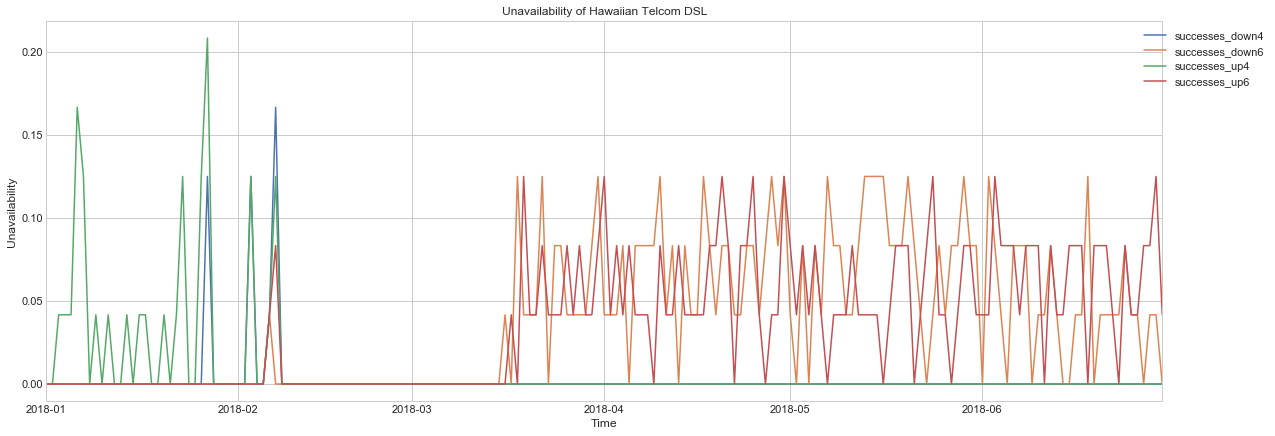

In [95]:
merge_time_Hawaiian_Telcom_DSL = merge_time.loc[merge_time['ISP&Technology'] == 'Hawaiian Telcom DSL', \
                                ['dtime', 'successes_down4', 'successes_down6', 'successes_up4', 'successes_up6']]
merge_time_Hawaiian_Telcom_DSL.set_index('dtime', drop = True, inplace = True)
fig, ax = plt.subplots(figsize=(20,7))
_ = merge_time_Hawaiian_Telcom_DSL.plot(ax=ax)
_ = ax.set_xlabel('Time')
_ = ax.set_ylabel('Unavailability')
_ = ax.set_title('Unavailability of Hawaiian Telcom DSL')
_ = ax.legend(bbox_to_anchor=(1.1, 1), shadow = True)

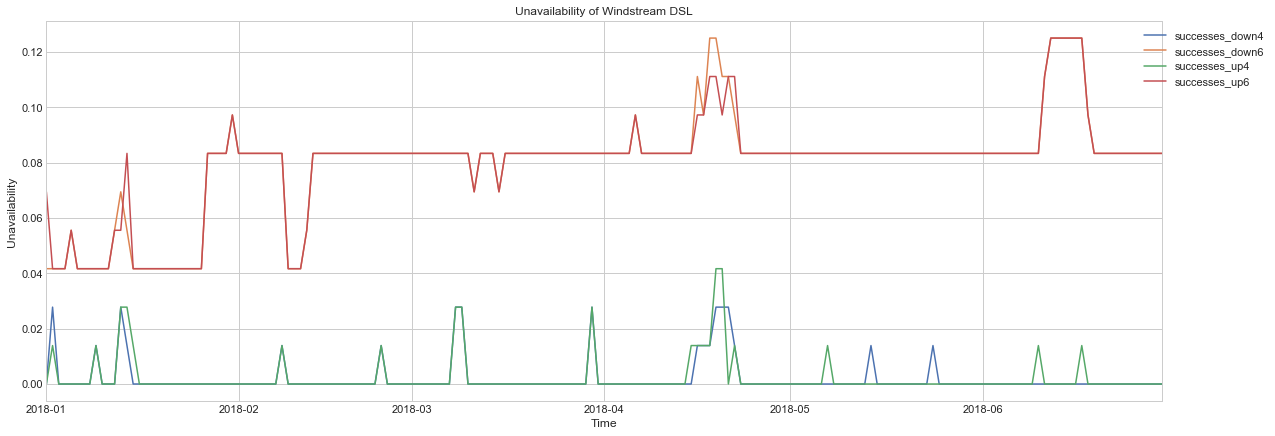

In [96]:
merge_time_Windstream_DSL = merge_time.loc[merge_time['ISP&Technology'] == 'Windstream DSL', \
                                ['dtime', 'successes_down4', 'successes_down6', 'successes_up4', 'successes_up6']]
merge_time_Windstream_DSL.set_index('dtime', drop = True, inplace = True)
fig, ax = plt.subplots(figsize=(20,7))
_ = merge_time_Windstream_DSL.plot(ax=ax)
_ = ax.set_xlabel('Time')
_ = ax.set_ylabel('Unavailability')
_ = ax.set_title('Unavailability of Windstream DSL')
_ = ax.legend(bbox_to_anchor=(1.1, 1), shadow = True)

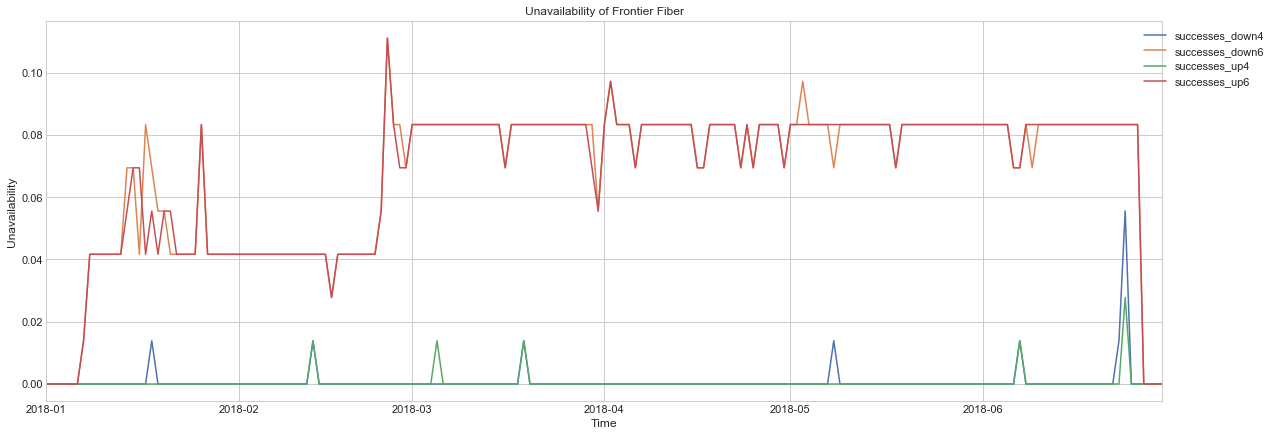

In [98]:
merge_time_Frontier_Fiber = merge_time.loc[merge_time['ISP&Technology'] == 'Frontier Fiber', \
                                ['dtime', 'successes_down4', 'successes_down6', 'successes_up4', 'successes_up6']]
merge_time_Frontier_Fiber.set_index('dtime', drop = True, inplace = True)
fig, ax = plt.subplots(figsize=(20,7))
_ = merge_time_Frontier_Fiber.plot(ax=ax)
_ = ax.set_xlabel('Time')
_ = ax.set_ylabel('Unavailability')
_ = ax.set_title('Unavailability of Frontier Fiber')
_ = ax.legend(bbox_to_anchor=(1.1, 1), shadow = True)

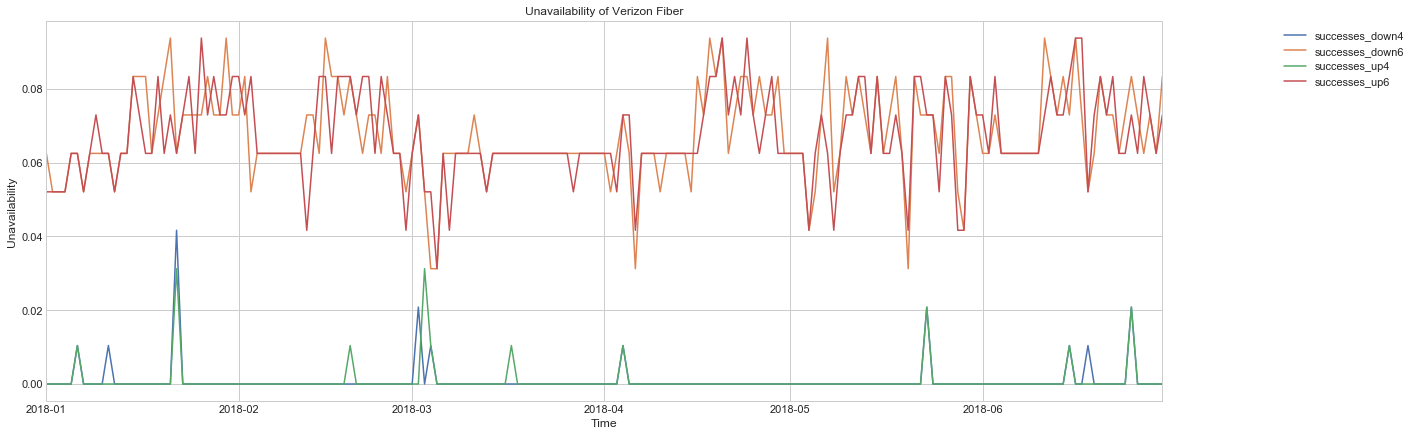

In [99]:
merge_time_Verizon_Fiber = merge_time.loc[merge_time['ISP&Technology'] == 'Verizon Fiber', \
                                ['dtime', 'successes_down4', 'successes_down6', 'successes_up4', 'successes_up6']]
merge_time_Verizon_Fiber.set_index('dtime', drop = True, inplace = True)
fig, ax = plt.subplots(figsize=(20,7))
_ = merge_time_Verizon_Fiber.plot(ax=ax)
_ = ax.set_xlabel('Time')
_ = ax.set_ylabel('Unavailability')
_ = ax.set_title('Unavailability of Verizon Fiber')
_ = ax.legend(bbox_to_anchor=(1.1, 1), shadow = True)

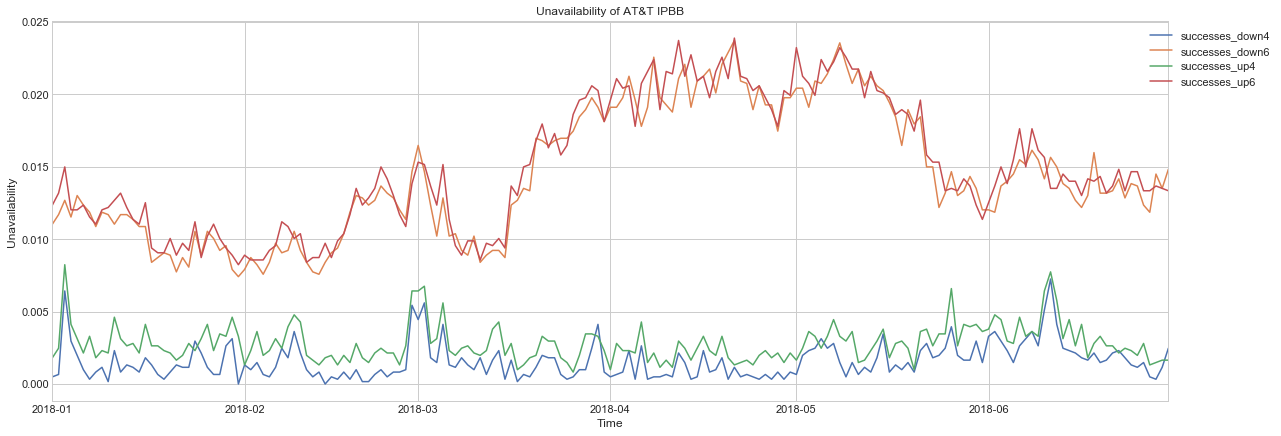

In [100]:
merge_time_Att_IPBB = merge_time.loc[merge_time['ISP&Technology'] == 'AT&T IPBB', \
                                ['dtime', 'successes_down4', 'successes_down6', 'successes_up4', 'successes_up6']]
merge_time_Att_IPBB.set_index('dtime', drop = True, inplace = True)
fig, ax = plt.subplots(figsize=(20,7))
_ = merge_time_Att_IPBB.plot(ax=ax)
_ = ax.set_xlabel('Time')
_ = ax.set_ylabel('Unavailability')
_ = ax.set_title('Unavailability of AT&T IPBB')
_ = ax.legend(bbox_to_anchor=(1.1, 1), shadow = True)

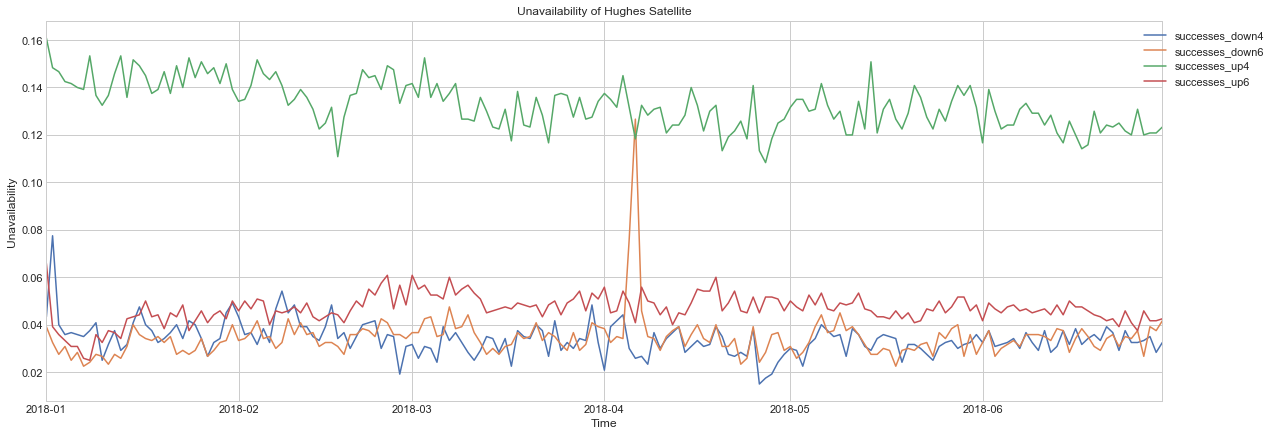

In [101]:
merge_time_Hughes_Satellite = merge_time.loc[merge_time['ISP&Technology'] == 'Hughes Satellite', \
                                ['dtime', 'successes_down4', 'successes_down6', 'successes_up4', 'successes_up6']]
merge_time_Hughes_Satellite.set_index('dtime', drop = True, inplace = True)
fig, ax = plt.subplots(figsize=(20,7))
_ = merge_time_Hughes_Satellite.plot(ax=ax)
_ = ax.set_xlabel('Time')
_ = ax.set_ylabel('Unavailability')
_ = ax.set_title('Unavailability of Hughes Satellite')
_ = ax.legend(bbox_to_anchor=(1.1, 1), shadow = True)